In [2]:
def findAllFiles(t): return glob.glob(t, recursive=True)

In [3]:
data_f = findAllFiles('data/*.csv')#[:5]

In [4]:
data_f

['data/Wick-airport.csv',
 'data/Oxford.csv',
 'data/Aberporth.csv',
 'data/Armagh.csv']

In [5]:
country_city = {'Wickairport':'Scotland', 
                'Oxford':'England', 'Aberporth':'Wales', 'Armagh':'Northern Ireland'}

In [6]:
data_df = []
for d in data_f:
    dfp = pd.read_csv(d)#.drop('Unnamed: 6', axis=1)
    if len(dfp.columns) == 7:
        dfp.drop('Unnamed: 6', axis=1, inplace=True)
    
    city_ = ''.join(d.split('/')[-1].split('.')[0].split('-'))
    # Declare a list that is to be converted into a column
    city = [city_]*len(dfp)
    country = [country_city[city_]]*len(dfp)
    # Using 'Address' as the column name
    # and equating it to the list
    dfp['city'] = city
    dfp['country'] = country
    print(d, len(dfp.columns))
    data_df.append(dfp)
    

data/Wick-airport.csv 8
data/Oxford.csv 8
data/Aberporth.csv 8
data/Armagh.csv 8


In [7]:
df = pd.concat(data_df)
df.head()

,year/month,tmax degC,tmin degC,af days,rain mm,sun hours,city,country
0,01/01/1972,6.2,2.4,6,63.2,33.1,Wickairport,Scotland
1,01/02/1972,6.4,2.6,2,68.8,53.7,Wickairport,Scotland
2,01/03/1972,7.9,3,4,21.7,112.8,Wickairport,Scotland
3,01/04/1972,10.1,3.6,0,52.4,148.1,Wickairport,Scotland
4,01/05/1972,11.5,6.1,0,37.1,142.9,Wickairport,Scotland


- Year/month
- tmax degC (maximum temp)
- tmin degC (minimum temp)
- Af days( snow days)
- Rain mm( rain in millimeters)
- Sun hours

In [8]:
df.rename(columns = {'year/month':'date','tmax degC':'max', 'tmin degC':'min','rain mm':'prcp'}, inplace=True)
# df['date'] = pd.to_datetime(df['date'])
df.head()

,date,max,min,af days,prcp,sun hours,city,country
0,01/01/1972,6.2,2.4,6,63.2,33.1,Wickairport,Scotland
1,01/02/1972,6.4,2.6,2,68.8,53.7,Wickairport,Scotland
2,01/03/1972,7.9,3,4,21.7,112.8,Wickairport,Scotland
3,01/04/1972,10.1,3.6,0,52.4,148.1,Wickairport,Scotland
4,01/05/1972,11.5,6.1,0,37.1,142.9,Wickairport,Scotland


In [9]:
df.shape

(5972, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5972 entries, 0 to 2032
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2420 non-null   object 
 1   max        2420 non-null   object 
 2   min        2420 non-null   object 
 3   af days    2420 non-null   object 
 4   prcp       2420 non-null   float64
 5   sun hours  2420 non-null   object 
 6   city       5972 non-null   object 
 7   country    5972 non-null   object 
dtypes: float64(1), object(7)
memory usage: 419.9+ KB


In [11]:
# Shape of training data (num_rows, num_columns)
print(df.shape)

# Number of missing values in each column 
df.isna().sum()

(5972, 8)


date         3552
max          3552
min          3552
af days      3552
prcp         3552
sun hours    3552
city            0
country         0
dtype: int64

In [12]:
df

,date,max,min,af days,prcp,sun hours,city,country
0,01/01/1972,6.2,2.4,6,63.2,33.1,Wickairport,Scotland
1,01/02/1972,6.4,2.6,2,68.8,53.7,Wickairport,Scotland
2,01/03/1972,7.9,3,4,21.7,112.8,Wickairport,Scotland
3,01/04/1972,10.1,3.6,0,52.4,148.1,Wickairport,Scotland
4,01/05/1972,11.5,6.1,0,37.1,142.9,Wickairport,Scotland
...,...,...,...,...,...,...,...,...
2028,NaN,NaN,NaN,NaN,NaN,NaN,Armagh,Northern Ireland
2029,NaN,NaN,NaN,NaN,NaN,NaN,Armagh,Northern Ireland
2030,NaN,NaN,NaN,NaN,NaN,NaN,Armagh,Northern Ireland
2031,NaN,NaN,NaN,NaN,NaN,NaN,Armagh,Northern Ireland


In [13]:
df.columns

Index(['date', 'max', 'min', 'af days', 'prcp', 'sun hours', 'city',
       'country'],
      dtype='object')

In [14]:
# an exploratory visualization of missing data.
# !pip install missingno

<AxesSubplot:>

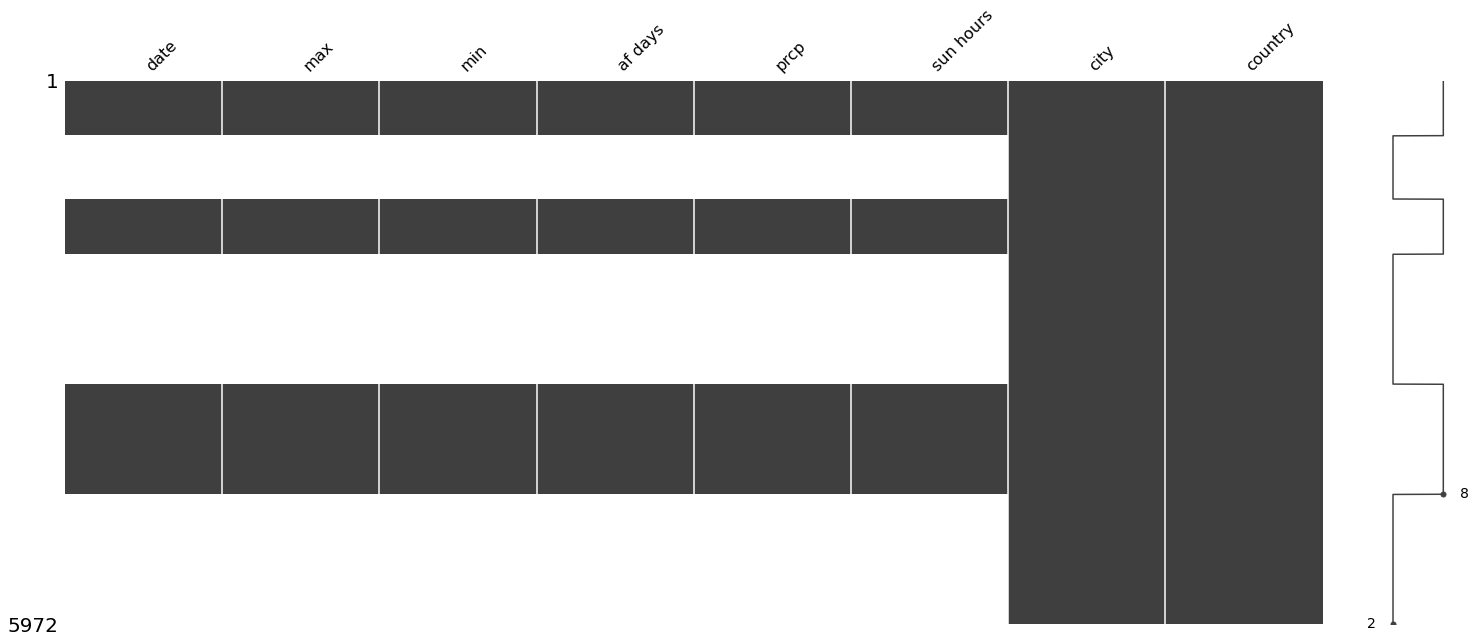

In [15]:
import missingno as msno
msno.matrix(df)

`Description`
- Drop the NAN's.

In [16]:
df.dropna(inplace=True)

In [17]:
df.head()

,date,max,min,af days,prcp,sun hours,city,country
0,01/01/1972,6.2,2.4,6,63.2,33.1,Wickairport,Scotland
1,01/02/1972,6.4,2.6,2,68.8,53.7,Wickairport,Scotland
2,01/03/1972,7.9,3,4,21.7,112.8,Wickairport,Scotland
3,01/04/1972,10.1,3.6,0,52.4,148.1,Wickairport,Scotland
4,01/05/1972,11.5,6.1,0,37.1,142.9,Wickairport,Scotland


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2420 entries, 0 to 604
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2420 non-null   object 
 1   max        2420 non-null   object 
 2   min        2420 non-null   object 
 3   af days    2420 non-null   object 
 4   prcp       2420 non-null   float64
 5   sun hours  2420 non-null   object 
 6   city       2420 non-null   object 
 7   country    2420 non-null   object 
dtypes: float64(1), object(7)
memory usage: 170.2+ KB


In [19]:
# Shape of training data (num_rows, num_columns)
print(df.shape)

# Number of missing values in each column 
df.isna().sum()

(2420, 8)


date         0
max          0
min          0
af days      0
prcp         0
sun hours    0
city         0
country      0
dtype: int64

In [20]:
df.head(2)

,date,max,min,af days,prcp,sun hours,city,country
0,01/01/1972,6.2,2.4,6,63.2,33.1,Wickairport,Scotland
1,01/02/1972,6.4,2.6,2,68.8,53.7,Wickairport,Scotland


In [21]:
def formatDate(date):
#     print(date)
    split = date.split('/')
    year = split[-1]
    month = split[1]
    day = split[0]
    
    return '-'.join([year, month, day])

In [22]:
# change date
df['date'] = pd.to_datetime(df.date.apply(lambda x: formatDate(str(x))))
df.set_index('date',inplace=True)


In [23]:
df.head(2)

,max,min,af days,prcp,sun hours,city,country
date,,,,,,,
1972-01-01,6.2,2.4,6,63.2,33.1,Wickairport,Scotland
1972-02-01,6.4,2.6,2,68.8,53.7,Wickairport,Scotland


In [ ]:
df

In [24]:
# # convert datatype to their respective types
for c in df[['max', 'min', 'af days', 'prcp', 'sun hours']]:
    df[c] = pd.to_numeric(df[c], errors='coerce')



In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2420 entries, 1972-01-01 to 2022-05-01
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   max        2419 non-null   float64
 1   min        2418 non-null   float64
 2   af days    2418 non-null   float64
 3   prcp       2420 non-null   float64
 4   sun hours  2074 non-null   float64
 5   city       2420 non-null   object 
 6   country    2420 non-null   object 
dtypes: float64(5), object(2)
memory usage: 151.2+ KB


In [26]:
# drop nan's again
df.dropna(inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2074 entries, 1972-01-01 to 2022-05-01
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   max        2074 non-null   float64
 1   min        2074 non-null   float64
 2   af days    2074 non-null   float64
 3   prcp       2074 non-null   float64
 4   sun hours  2074 non-null   float64
 5   city       2074 non-null   object 
 6   country    2074 non-null   object 
dtypes: float64(5), object(2)
memory usage: 129.6+ KB


<AxesSubplot:>

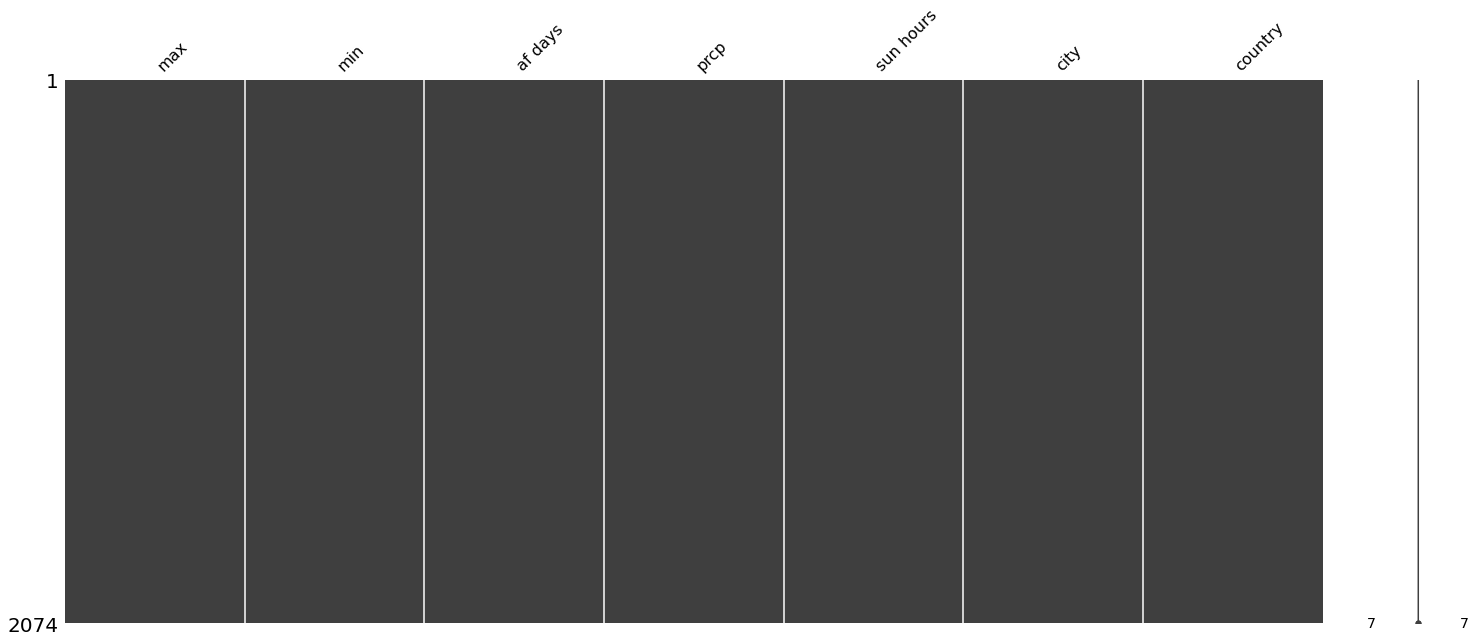

In [28]:
msno.matrix(df)

No missing values

In [29]:
df.head(1)

,max,min,af days,prcp,sun hours,city,country
date,,,,,,,
1972-01-01,6.2,2.4,6.0,63.2,33.1,Wickairport,Scotland


In [30]:
# Interpolate numerical variables for the missing days
df = df.interpolate()

# Re-setting year, month, day fields
df['year'] = df.index.year
df['mo'] = df.index.month
df['da'] = df.index.day

In [31]:
df.head()

,max,min,af days,prcp,sun hours,city,country,year,mo,da
date,,,,,,,,,,
1972-01-01,6.2,2.4,6.0,63.2,33.1,Wickairport,Scotland,1972,1,1
1972-02-01,6.4,2.6,2.0,68.8,53.7,Wickairport,Scotland,1972,2,1
1972-03-01,7.9,3.0,4.0,21.7,112.8,Wickairport,Scotland,1972,3,1
1972-04-01,10.1,3.6,0.0,52.4,148.1,Wickairport,Scotland,1972,4,1
1972-05-01,11.5,6.1,0.0,37.1,142.9,Wickairport,Scotland,1972,5,1


In [32]:
df.year.unique()

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [33]:
df['temp'] = (df['max'] + df['min'])/ 2

## Exploratory Analysis

In [34]:
df.columns

Index(['max', 'min', 'af days', 'prcp', 'sun hours', 'city', 'country', 'year',
       'mo', 'da', 'temp'],
      dtype='object')

In [35]:
df[['max', 'min', 'af days', 'prcp', 'sun hours', 'temp']].describe()

,max,min,af days,prcp,sun hours,temp
count,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000
mean,13.064513,6.479315,2.666345,65.639875,118.563211,9.771914
std,4.856075,3.885847,4.271034,36.008611,59.571168,4.304214
min,1.000000,-4.100000,0.000000,0.000000,11.300000,-1.550000
25%,8.900000,3.300000,0.000000,39.400000,69.050000,6.212500
50%,12.700000,6.000000,0.000000,59.800000,112.850000,9.150000
75%,16.900000,10.000000,4.000000,86.975000,160.800000,13.450000
max,27.400000,15.700000,25.000000,219.200000,322.800000,21.100000


## EDA

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

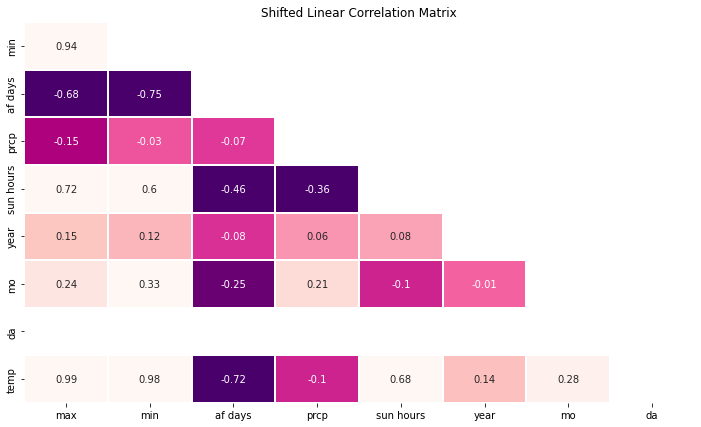

In [37]:
''' Plot a Shifted Correlation Matrix '''
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(df)

In [38]:
df.columns

Index(['max', 'min', 'af days', 'prcp', 'sun hours', 'city', 'country', 'year',
       'mo', 'da', 'temp'],
      dtype='object')

In [39]:
data = df[['temp','min','max','prcp']]
data.reset_index(inplace=True)
data.columns = ['Date','Avg Temp', 'Min Temp', 'Max Temp', 'Precip']

In [40]:
data.head()

,Date,Avg Temp,Min Temp,Max Temp,Precip
0,1972-01-01,4.30,2.4,6.2,63.2
1,1972-02-01,4.50,2.6,6.4,68.8
2,1972-03-01,5.45,3.0,7.9,21.7
3,1972-04-01,6.85,3.6,10.1,52.4
4,1972-05-01,8.80,6.1,11.5,37.1


### Lowest temperature

Ranking by Daily Mininum Temperature

In [41]:
rank = data.sort_values('Min Temp').head(10).reset_index(drop=True)
rank.index = rank.index + 1
rank


,Date,Avg Temp,Min Temp,Max Temp,Precip
1,1986-02-01,-1.55,-4.1,1.0,7.3
2,2010-12-01,-0.40,-3.8,3.0,37.7
3,1979-01-01,0.05,-3.1,3.2,56.8
4,1986-02-01,-0.20,-2.7,2.3,0.0
5,1979-01-01,0.70,-2.3,3.7,61.8
6,1985-01-01,0.50,-2.2,3.2,46.8
7,2010-12-01,0.25,-2.2,2.7,32.7
8,1979-01-01,0.65,-2.1,3.4,66.5
9,1981-12-01,0.80,-2.0,3.6,74.0
10,1984-01-01,1.00,-1.9,3.9,136.9


### Highest temperature
Ranking by Daily Maximum Temperature

In [42]:
rank = data.sort_values('Max Temp', ascending=False).head(10).reset_index(drop=True)
rank.index = rank.index + 1
rank

,Date,Avg Temp,Min Temp,Max Temp,Precip
1,2018-07-01,20.80,14.2,27.4,23.2
2,2006-07-01,21.00,14.9,27.1,87.3
3,1983-07-01,21.10,15.4,26.8,21.7
4,1995-08-01,20.15,13.9,26.4,4.4
5,1976-07-01,19.55,13.2,25.9,14.3
6,2013-07-01,19.70,13.9,25.5,45.7
7,2003-08-01,19.50,13.5,25.5,3.0
8,1995-07-01,19.50,13.9,25.1,37.8
9,1975-08-01,19.60,14.1,25.1,30.2
10,1989-07-01,19.45,14.0,24.9,29.4


### Highest precipitation
Ranking by Daily Precipiation

In [43]:
rank = data.sort_values('Precip', ascending=False).head(10).reset_index(drop=True)
rank.index = rank.index + 1
rank

,Date,Avg Temp,Min Temp,Max Temp,Precip
1,1987-10-01,9.85,7.0,12.7,219.2
2,1997-11-01,9.35,7.4,11.3,219.0
3,1981-10-01,8.75,6.5,11.0,217.2
4,2015-12-01,9.75,7.7,11.8,210.4
5,2009-11-01,8.85,6.6,11.1,203.8
6,1974-01-01,6.20,3.8,8.6,203.2
7,2014-01-01,6.20,4.0,8.4,195.4
8,2000-10-01,10.45,8.0,12.9,195.0
9,2005-10-01,12.60,10.6,14.6,194.4
10,1993-06-01,13.25,10.6,15.9,190.6


### Problem Statement

•	How is the weather changing in key locations across the UK for the past 50 years? (Descriptive analysis will answer this question)

•	What are the indicators of climate change in key locations in the UK?

•	How is the distribution of temperature increase across key locations in the UK for the past 50 years? 


### How is the distribution of temperature increase across key locations in the UK for the past 50 years?



### A quick look - time series

In [44]:
df.columns

Index(['max', 'min', 'af days', 'prcp', 'sun hours', 'city', 'country', 'year',
       'mo', 'da', 'temp'],
      dtype='object')

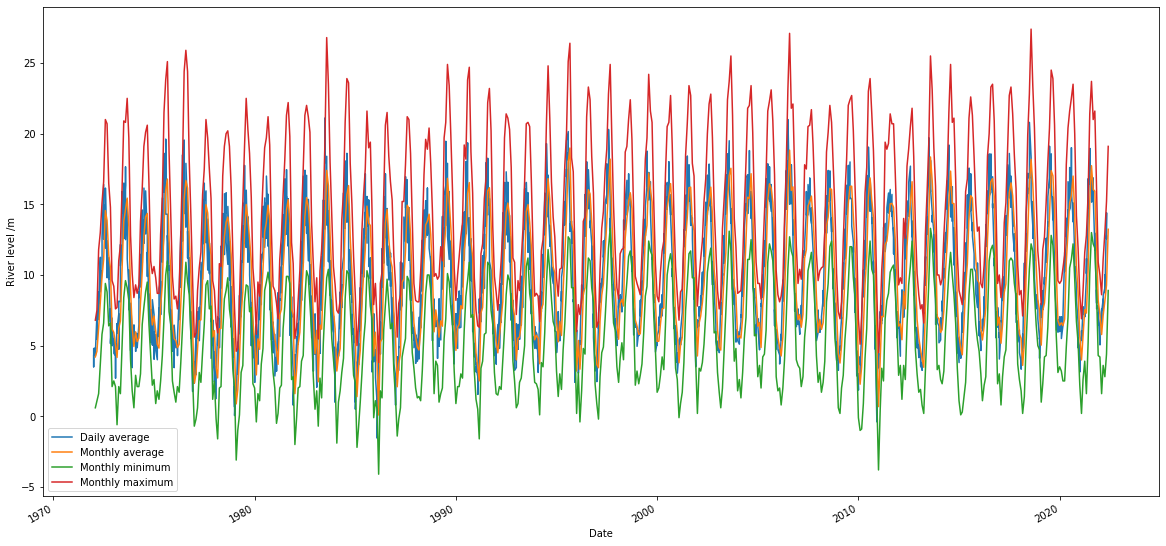

In [45]:
rs_monthly = df.resample('M')

plt.figure(figsize=(20,10))

df['temp'].plot(label='Daily average')

rs_monthly['temp'].mean().plot(label='Monthly average')
rs_monthly['min'].min().plot(label='Monthly minimum')
rs_monthly['max'].max().plot(label='Monthly maximum')
plt.xlabel('Date')
plt.ylabel('River level /m')
plt.gca().legend()
plt.show()

a better view

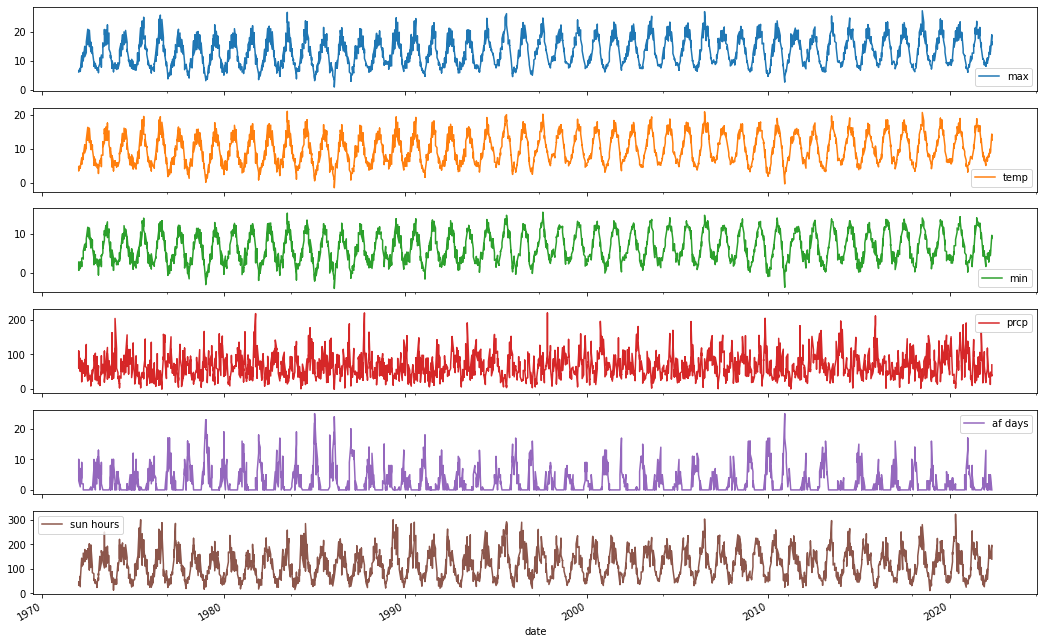

In [46]:
df[['max','temp','min','prcp','af days','sun hours']].plot(subplots=True, figsize=(18,12));


In [47]:
df

,max,min,af days,prcp,sun hours,city,country,year,mo,da,temp
date,,,,,,,,,,,
1972-01-01,6.2,2.4,6.0,63.2,33.1,Wickairport,Scotland,1972,1,1,4.30
1972-02-01,6.4,2.6,2.0,68.8,53.7,Wickairport,Scotland,1972,2,1,4.50
1972-03-01,7.9,3.0,4.0,21.7,112.8,Wickairport,Scotland,1972,3,1,5.45
1972-04-01,10.1,3.6,0.0,52.4,148.1,Wickairport,Scotland,1972,4,1,6.85
1972-05-01,11.5,6.1,0.0,37.1,142.9,Wickairport,Scotland,1972,5,1,8.80
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,8.2,3.7,2.0,42.0,50.3,Armagh,Northern Ireland,2022,1,1,5.95
2022-02-01,9.2,3.6,2.0,117.6,57.5,Armagh,Northern Ireland,2022,2,1,6.40
2022-03-01,12.4,2.8,5.0,42.0,196.0,Armagh,Northern Ireland,2022,3,1,7.60


### Distributions

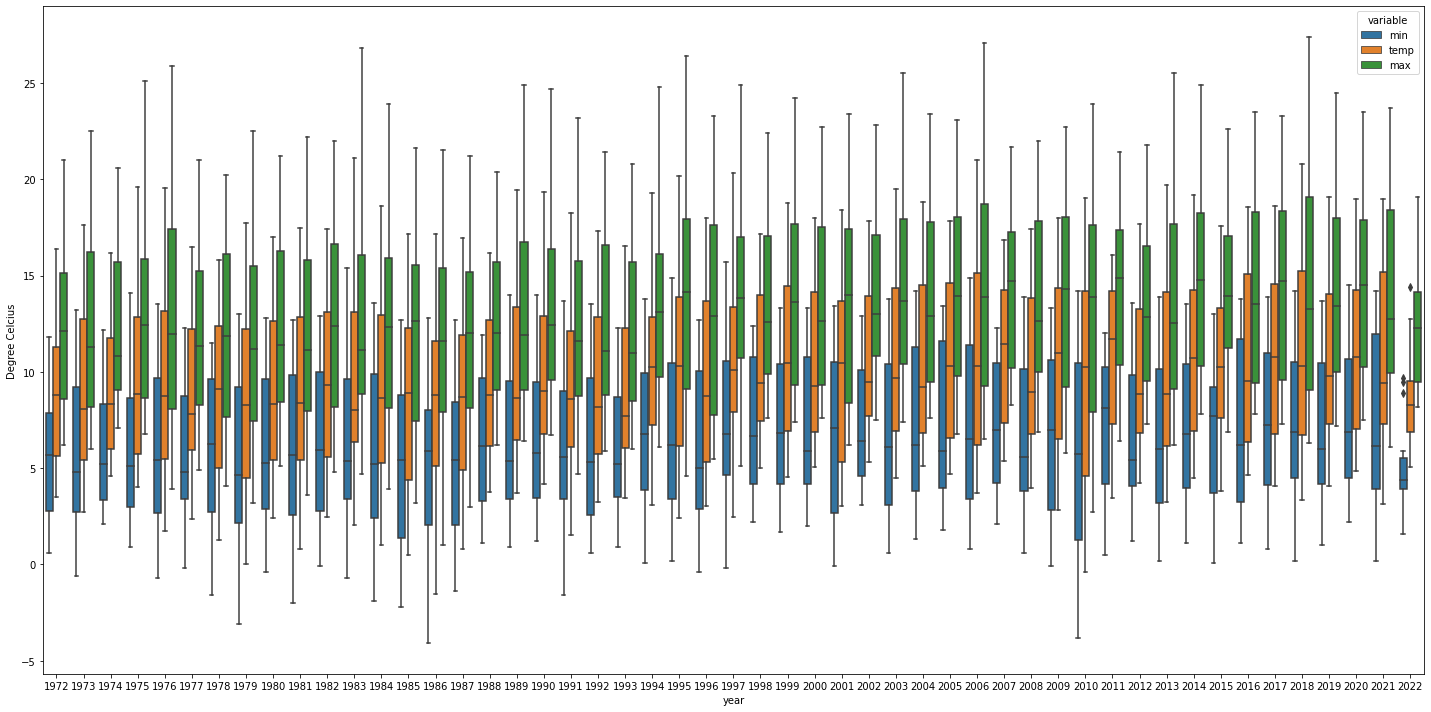

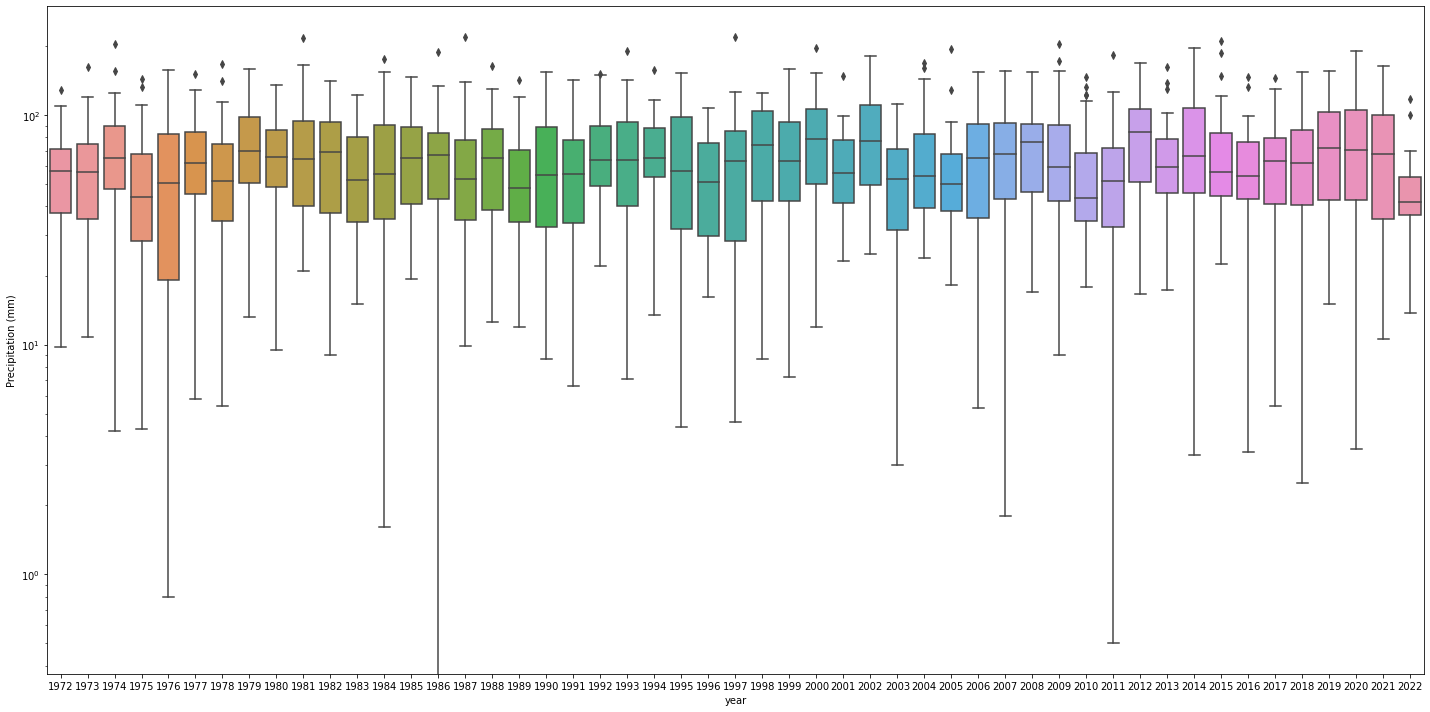

In [48]:
# melt to display
data = pd.melt(df, 'year', ['temp','min','max'], 
               var_name='variable', value_name='degree')

plt.subplots(figsize=(20,10))

# Avg, Min, Max temp. boxplot
ax = sns.boxplot(x='year',y='degree',hue='variable', hue_order=['min','temp','max'],
           data=data)
ax.set_ylabel('Degree Celcius')

plt.tight_layout()

plt.show()

# Precip. boxplot
plt.subplots(figsize=(20,10))
ax  = sns.boxplot(x='year', y='prcp', data=df)
plt.tight_layout()

ax.set_ylabel('Precipitation (mm)');
ax.set_yscale('log')

- For the years after 1993, their boxplot is short. This suggests that there is strong agreement between the temperature distribution over the course of the years. 

- For the year 1972 and 1985 it boxplots are comparatively tall. This suggests that the temperature hold quite different opinions. 

In [49]:
df.columns

Index(['max', 'min', 'af days', 'prcp', 'sun hours', 'city', 'country', 'year',
       'mo', 'da', 'temp'],
      dtype='object')

In [50]:
cols_to_plot = ['af days', 'prcp', 'sun hours']

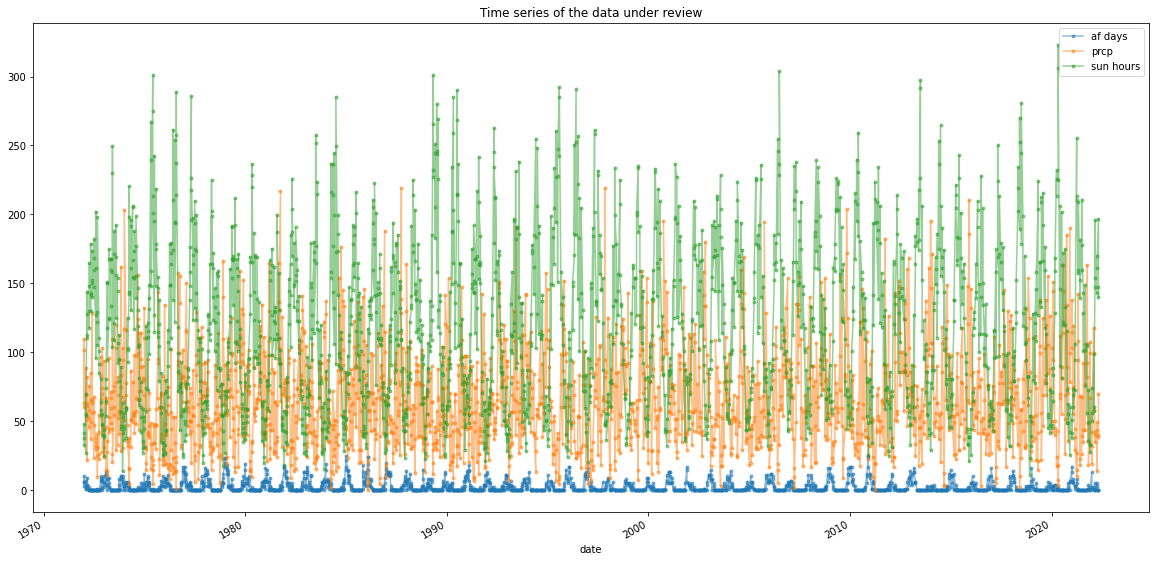

In [51]:
axes = df[cols_to_plot].plot(marker=".", alpha=0.5, figsize=(20, 10), subplots=False)
axes.set_title('Time series of the data under review')
plt.show()

- We can see the sunny days are higher than precipitation and snowy days.`

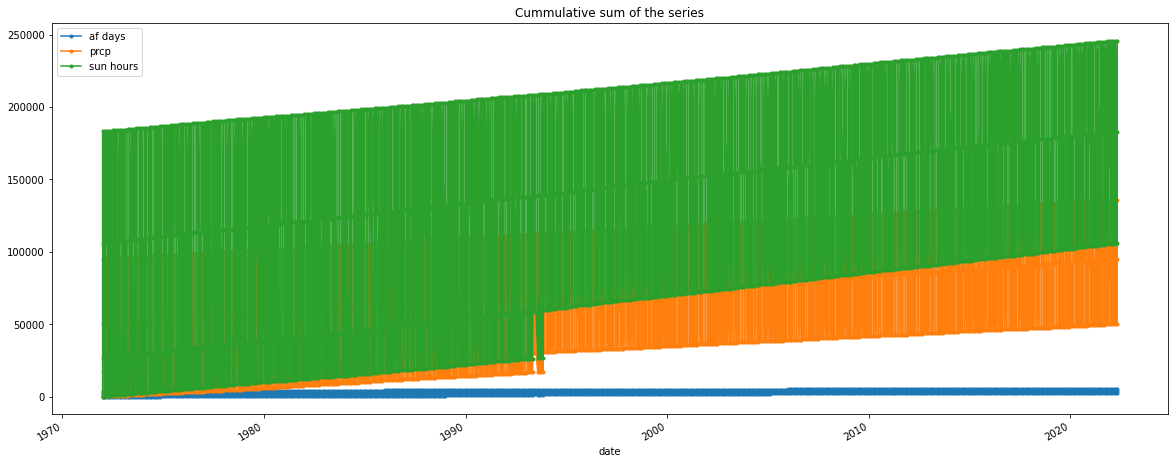

In [52]:
ts = df[cols_to_plot].cumsum()
axes = ts.plot(figsize=(20,8), marker='.')
axes.set_title('Cummulative sum of the series')
plt.show()

### Extracting seasonal temperatures
Let’s now select data from different seasons of the year 

The U.K. Met Office registered a provisional reading of 40.2 degrees Celsius (104.4 degrees Fahrenheit) at Heathrow Airport — breaking the record set just an hour earlier. Before Tuesday, the highest temperature recorded in Britain was 38.7 C (101.7 F), a record set in 2019.

reference: https://www.google.com/search?q=highest+temperature+recorded+in+uk+abd+which+year&sxsrf=ALiCzsZcJEIAa9wFuvhDqxwiRhufnz0cbw%3A1659416272921&ei=0K7oYtDkN5iDlwT47KiwBw&ved=0ahUKEwjQjO2rr6f5AhWYwYUKHXg2CnYQ4dUDCA4&uact=5&oq=highest+temperature+recorded+in+uk+abd+which+year&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIHCCEQoAEQCjoHCAAQRxCwAzoJCAAQsAMQChBDOgcIABCwAxBDOgUIABCABDoGCAAQHhAWOgUIIRCgAToICCEQHhAWEB06BQgAEIYDOgYIIRAKEBU6CgghEB4QFhAKEB1KBAhBGABKBAhGGABQsANYjRpgmRtoAXABeACAAbgCiAHiHZIBBjItMTEuM5gBAKABAcgBCsABAQ&sclient=gws-wiz-serp#:~:text=U.K.%20breaks,awake%2Dfrom%2Dt...

So we are going to  use

Winter (December 2018 - February 2019)

Spring (March 2019 - May 2019)

Summer (June 2019 - August 2019)

Autumn (Septempber 2019 - November 2019)

In [53]:
dff = df.resample('5Y').mean()

In [54]:


winter = dff.loc[(dff.index >= '1972-12-01') & (dff.index < '2022-03-01')]#dff.loc[(dff.index >= '201212010000') & (dff.index < '201303010000')]
winter_temps = winter[['temp','af days']]

spring = dff.loc[(dff.index >= '1972-03-01') & (dff.index < '2022-06-01')]
spring_temps = spring[['temp','prcp']]

summer = dff.loc[(dff.index >= '1972-06-01') & (dff.index < '2022-09-01')]
summer_temps = summer[['temp','sun hours']]

autumn = dff.loc[(dff.index >= '1972-09-01') & (dff.index < '2022-12-01')]
autumn_temps = autumn['temp']


In [55]:
# winter = df.loc[(df.index >= '2018-12-01') & (df.index < '2019-03-01')]#df.loc[(df.index >= '201212010000') & (df.index < '201303010000')]
# winter_temps = winter['temp']

# spring = df.loc[(df.index >= '2019-03-01') & (df.index < '2019-06-01')]
# spring_temps = spring['temp']

# summer = df.loc[(df.index >= '2019-06-01') & (df.index < '2019-09-01')]
# summer_temps = summer['temp']

# autumn = df.loc[(df.index >= '2019-09-01') & (df.index < '2019-12-01')]
# autumn_temps = autumn['temp']


/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_2337/152914523.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


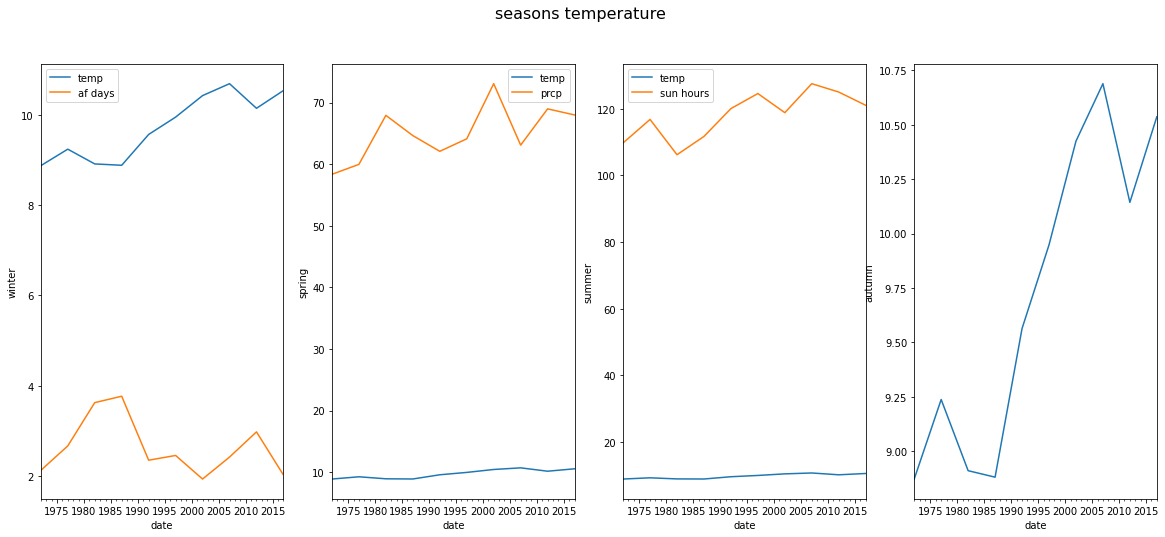

In [56]:

fig, ax =plt.subplots(1,4, figsize=(20, 8))

fig.suptitle('seasons temperature', fontsize=16)

winter_temps.plot(ax=ax[0], ylabel='winter')
spring_temps.plot(ax=ax[1], ylabel='spring')
summer_temps.plot(ax=ax[2], ylabel='summer')
autumn_temps.plot(ax=ax[3], ylabel='autumn')


fig.show();

In [57]:
# know_weather = ['prcp','af days','sun hours']


# fig, ax =plt.subplots(1,3, figsize=(20, 8))

# # fig.suptitle('seasons tempertature', fontsize=16)

# winter_temps.plot(ax=ax[0], ylabel='winter')
# spring_temps.plot(ax=ax[1], ylabel='spring')
# summer_temps.plot(ax=ax[2], ylabel='summer')

# sns.distplot(wickairport_df["prcp"],ax=ax[0])
# sns.distplot(wickairport_df["prcp"],ax=ax[0])
# sns.distplot(wickairport_df["prcp"],ax=ax[0])
# # autumn_temps.plot(ax=ax[3], ylabel='autumn')


# fig.show();

# for k in know_weather:


### Year Summary

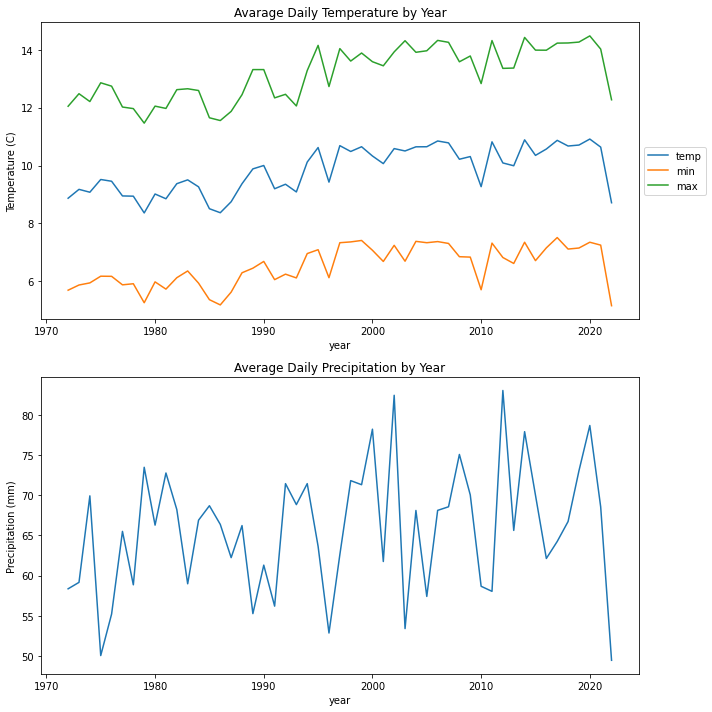

In [58]:
year_df = df.groupby('year').mean()

f, axes = plt.subplots(nrows=2, figsize=(10,10))
ax = year_df[['temp','min','max']].plot(ax=axes[0]);
# ax = year_df[['temp','min','max', 'sun hours']].plot(ax=axes[0]);

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Temperature (C)')
ax.set_title('Avarage Daily Temperature by Year');

ax = year_df['prcp'].plot(ax=axes[1]);
ax.set_ylabel('Precipitation (mm)')
ax.set_title('Average Daily Precipitation by Year');

plt.tight_layout();

- 2020 is not that hot compared to the past 10 years

### Month Summary

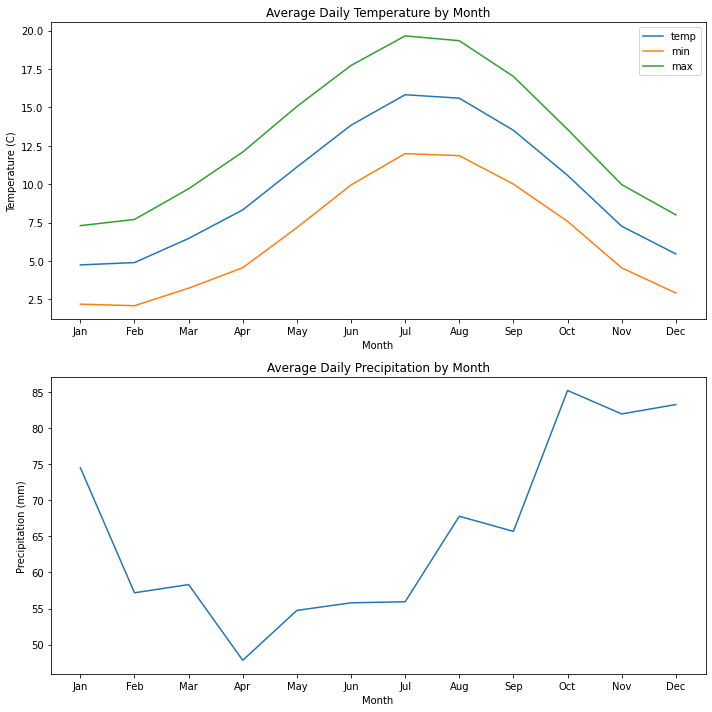

In [59]:
# for labeling
months = ['Jan','Feb','Mar','Apr','May','Jun',
          'Jul','Aug','Sep','Oct','Nov','Dec']

data = df.groupby(['mo'], as_index=False)[['temp','min','max','prcp']].mean()

f, axes = plt.subplots(nrows=2, figsize=(10,10))
ax = data[['temp','min','max']].plot(ax=axes[0]);
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Month')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(months)
ax.set_title('Average Daily Temperature by Month');

ax = data['prcp'].plot(ax=axes[1]);
ax.set_ylabel('Precipitation (mm)')
ax.set_xlabel('Month')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(months)
ax.set_title('Average Daily Precipitation by Month');

plt.tight_layout();

### Heatmaps

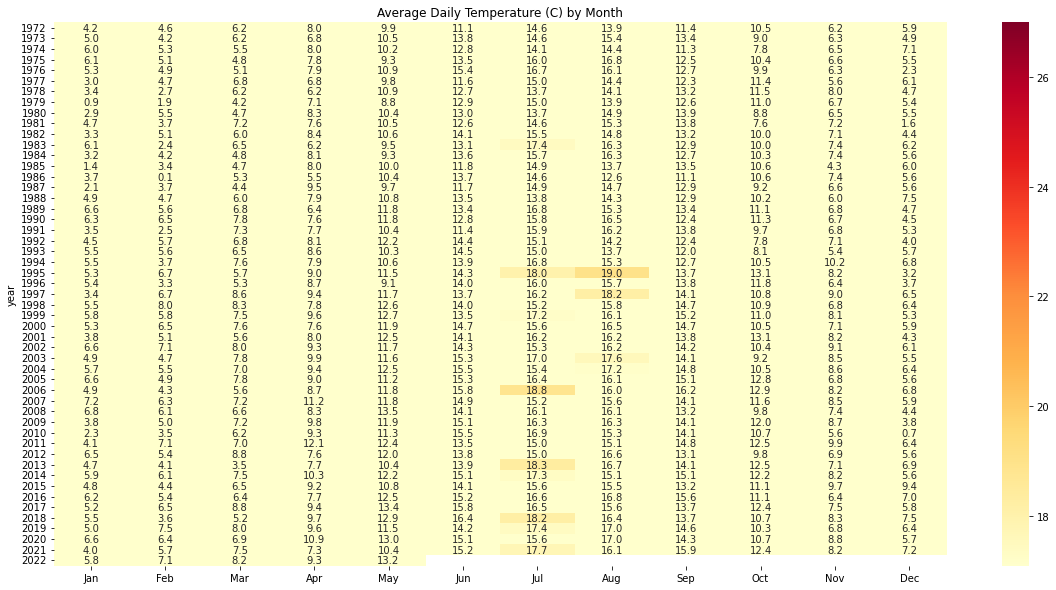

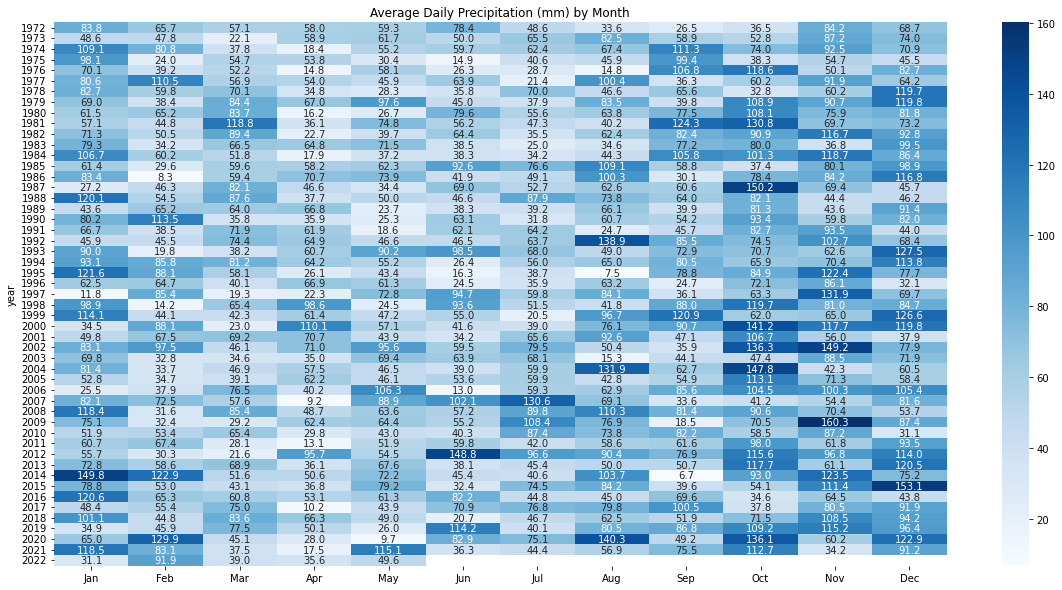

In [60]:
month_df = df.groupby(['year','mo'], as_index=False)[['temp','prcp']].mean()

# Temperature heatmap
data = month_df.pivot('year','mo','temp')
data.columns = months

plt.subplots(figsize=(20,10))
sns.heatmap(data, cmap='YlOrRd',annot=True, fmt='.1f', vmin=27)
plt.title('Average Daily Temperature (C) by Month')
plt.yticks(rotation=0)
plt.show()

# Precipitation heatmap
data = month_df.pivot('year','mo','prcp')
data.columns = months

plt.subplots(figsize=(20,10))
sns.heatmap(data, cmap='Blues',annot=True, fmt='.1f')
plt.title('Average Daily Precipitation (mm) by Month')
plt.yticks(rotation=0);


A plot to show the degree of precipitation.

### 1972 vs 2022 Comparison

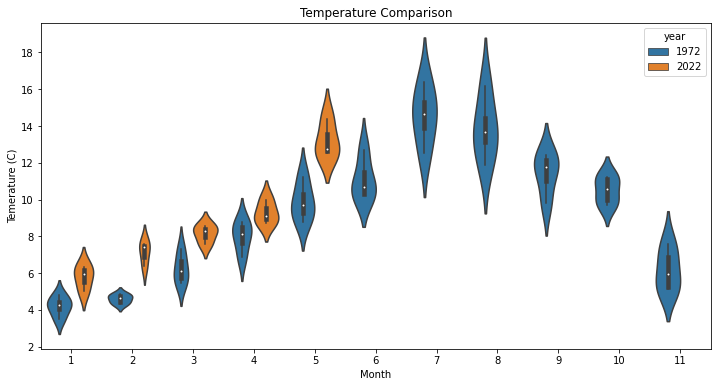

In [61]:
# slicing only for 1972, 2022 and until November as we don't have data for December
condition = np.logical_and(df['year'].isin([1972,2022]), df['mo'] <= 11)
data = df[condition]

plt.subplots(figsize=(12,6))

sns.violinplot(x='mo', y='temp', hue='year', data=data)
plt.xlabel('Month')
plt.ylabel('Temerature (C)')
plt.title('Temperature Comparison');

- The plot elements show the median weight for the January of 1972 is higher than the other months, followed by 8th Month (September).

- The plot elements show the median weight for the May of 2022 is higher than the other months, followed by 1th Month (January).




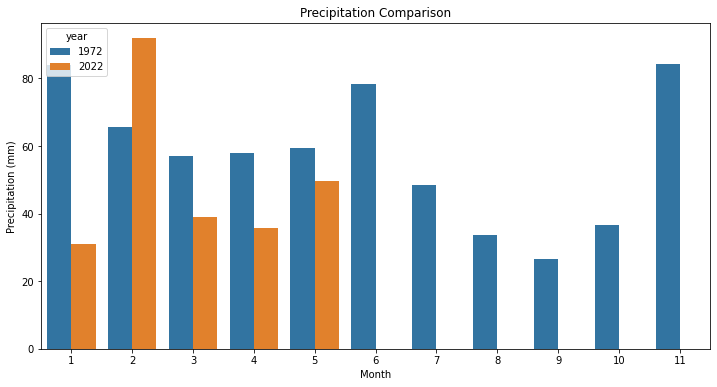

In [62]:
plt.subplots(figsize=(12,6))
sns.barplot(x='mo',y='prcp', hue='year', data=data, ci=None)
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Comparison');

- The second month of 2020, February, saw a lot of rain; the least amount fell in January (1).
- In 1972, November saw the most rain, and September saw the least.

/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_2337/3377269413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['monthday'] = data.index.strftime('%m%d')


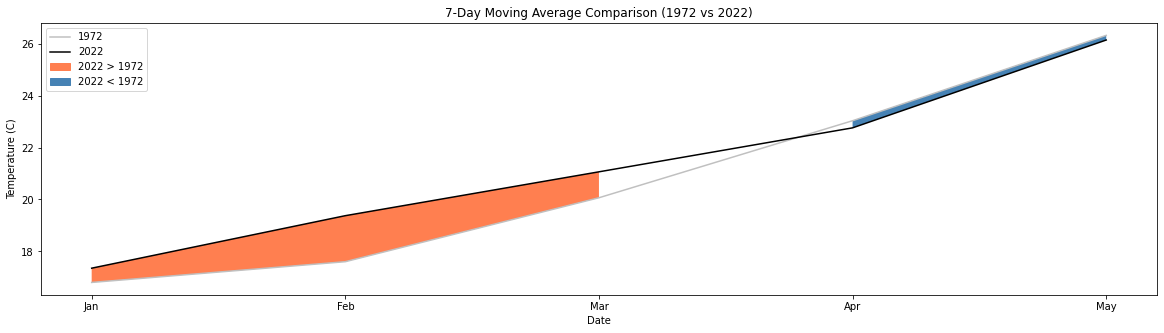

In [63]:
month_begins = ['0101','0201','0301','0401','0501','0601','0701','0801','0901','1001','1101','1201']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

data = df[df['year'].isin([1972,2022])]
data['monthday'] = data.index.strftime('%m%d')
data = data.pivot_table(index='monthday', columns='year', values='temp', aggfunc='sum').dropna()
# data = data.pivot_table(index='monthday', columns='year', values='temp', aggfunc='sum').dropna()

window = 7
data = data.rolling(window, min_periods=1).mean()

d1972 = data.loc[:, 1972]
d2022 = data.loc[:, 2022]

f, ax = plt.subplots(figsize=(20,5))

# Plot 1972
plt.plot(data.index, d1972, label='1972', color='silver')
plt.xticks(month_begins[:11] ,months[:11])

# Plot 2022
plt.plot(data.index, d2022, label='2022', color='k')
plt.xticks(month_begins[:11], months[:11])

# Where 2022 is higher than 1972 - filling a warm color
plt.fill_between(data.index, d1972, d2022, where= d2022 >= d1972,
                facecolor='coral') 

# Where 2022 is lower than 1972 -  filling a cool color
plt.fill_between(data.index, d1972, d2022, where= d2022 < d1972,
                facecolor='steelblue')

plt.title('{}-Day Moving Average Comparison (1972 vs 2022)'.format(window))
plt.ylabel('Temperature (C)')
plt.xlabel('Date')

import matplotlib.patches as mpatches
handles, labels = ax.get_legend_handles_labels()
handles = handles + [mpatches.Patch(color='coral'), mpatches.Patch(color='steelblue')]
labels = labels + ['2022 > 1972','2022 < 1972']
plt.legend(handles=handles, labels=labels);


### How is the weather changing in key locations across the UK for the past 50 years? (Descriptive analysis will answer this question)

In [64]:
df.city.unique()

array(['Wickairport', 'Oxford', 'Aberporth', 'Armagh'], dtype=object)

In [65]:
df

,max,min,af days,prcp,sun hours,city,country,year,mo,da,temp
date,,,,,,,,,,,
1972-01-01,6.2,2.4,6.0,63.2,33.1,Wickairport,Scotland,1972,1,1,4.30
1972-02-01,6.4,2.6,2.0,68.8,53.7,Wickairport,Scotland,1972,2,1,4.50
1972-03-01,7.9,3.0,4.0,21.7,112.8,Wickairport,Scotland,1972,3,1,5.45
1972-04-01,10.1,3.6,0.0,52.4,148.1,Wickairport,Scotland,1972,4,1,6.85
1972-05-01,11.5,6.1,0.0,37.1,142.9,Wickairport,Scotland,1972,5,1,8.80
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,8.2,3.7,2.0,42.0,50.3,Armagh,Northern Ireland,2022,1,1,5.95
2022-02-01,9.2,3.6,2.0,117.6,57.5,Armagh,Northern Ireland,2022,2,1,6.40
2022-03-01,12.4,2.8,5.0,42.0,196.0,Armagh,Northern Ireland,2022,3,1,7.60


### Problem Statement

•	What are the indicators of climate change in key locations in the UK?

•	How is the distribution of temperature increase across key locations in the UK for the past 50 years? 


There are 5 nations in the UK; let's examine each one in turn.

### Wickairport

 What are the indicators of climate change in key locations in the UK?

In [66]:
wickairport_df= df.query('city=="Wickairport"')
wickairport_df.head(3)

,max,min,af days,prcp,sun hours,city,country,year,mo,da,temp
date,,,,,,,,,,,
1972-01-01,6.2,2.4,6.0,63.2,33.1,Wickairport,Scotland,1972,1,1,4.30
1972-02-01,6.4,2.6,2.0,68.8,53.7,Wickairport,Scotland,1972,2,1,4.50
1972-03-01,7.9,3.0,4.0,21.7,112.8,Wickairport,Scotland,1972,3,1,5.45


In [67]:
# # lets get the mean in each 
# # temp_ = scotland_df['year']
# wickairport_df = wickairport_df.resample('Y').mean()
# wickairport_df['year'] = scotland_df['year'].astype(int)
# # scotland_df['year'] = temp_

### Distributions

/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_2337/806314254.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


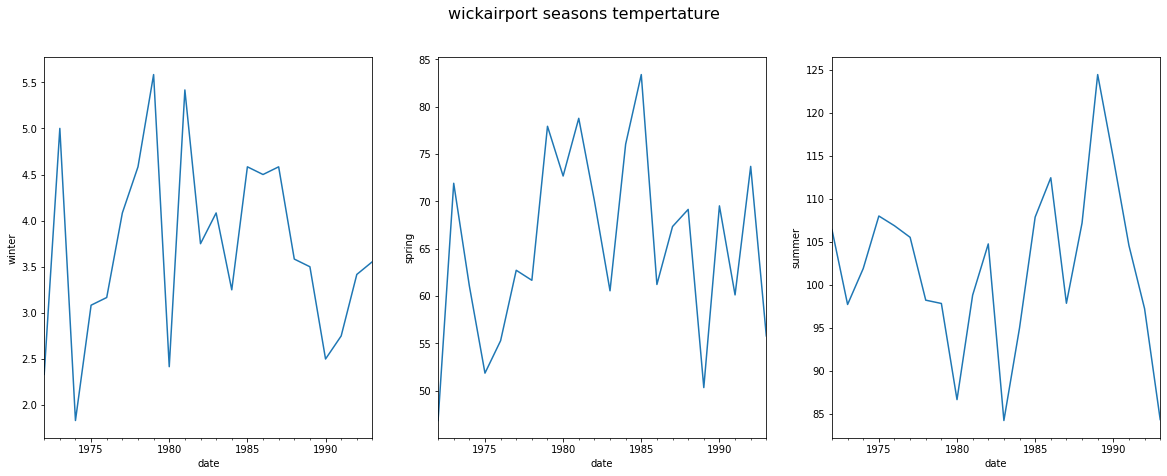

In [68]:
wick_mean = wickairport_df.resample('Y').mean()
fig, ax =plt.subplots(1,3, figsize=(20, 7))

fig.suptitle('wickairport seasons tempertature', fontsize=16)

wick_mean['af days'].plot(ax=ax[0], ylabel='winter')
wick_mean['prcp'].plot(ax=ax[1], ylabel='spring')
wick_mean['sun hours'].plot(ax=ax[2], ylabel='summer')
# autumn_temps.plot(ax=ax[3], ylabel='autumn')


fig.show();

For this distribution the time range from 1972 to 1992.

- For winter season, can see a high peak around 1979 and a low peak in 1980.
- For Spring season, can see a high peak around 1986 and a low peak in 1989.
- For summer, can see a high peak around 1989 and a low peak in 1984.

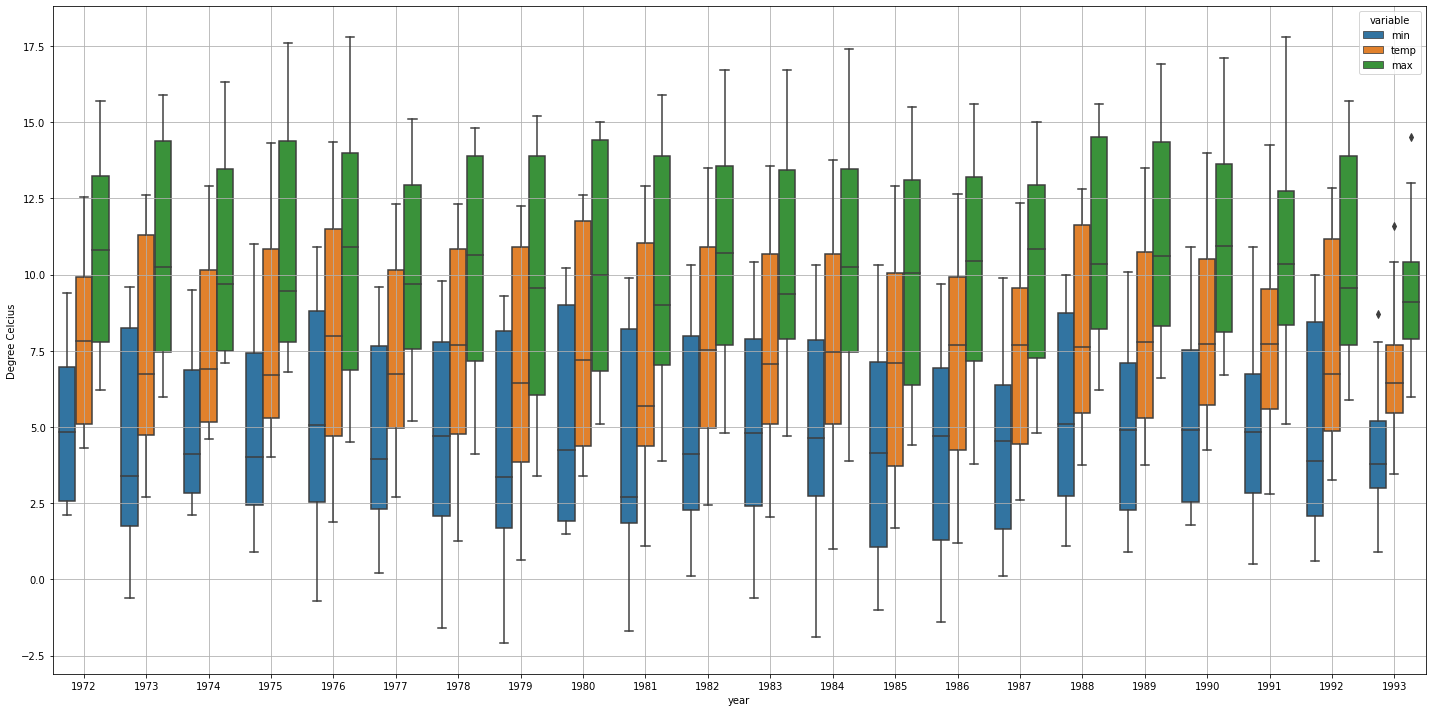

In [69]:
# melt to display
data = pd.melt(wickairport_df, 'year', ['temp','min','max'], 
               var_name='variable', value_name='degree')

plt.subplots(figsize=(20,10))

# Avg, Min, Max temp. boxplot
ax = sns.boxplot(x='year',y='degree',hue='variable', hue_order=['min','temp','max'],
           data=data)
ax.set_ylabel('Degree Celcius')

plt.tight_layout()
plt.grid()  
plt.show()


**Highest**
- The year 1977, 1991, and 1976 had the highest temperature in that order. 

- For our analysis, we will use the highest maximums, which for 1977 and 1991 were above 17.5 degrees celsius. In contrast to the other years, which had a median temperature above 7.5 degrees celsius each, 1991 and 1977 had minimum temperatures that were below 1 and 0 respectively.


**Lowest**

- Using the years with the lowest temperature below 1.5 degree celsius, the year 1979 and 1984 had the lowest temperature in that order. 

- With a median temperature of more than 6 degrees Celsius, the year 1979 had temperatures with a maximum above 11.5 and a minimum below -1. The average temperature in 1984 was 7.5 degrees Celsius, with a maximum temperature of over 12.5 and a minimum temperature of under -1.

### What are the indicators of climate change in key locations in the UK?

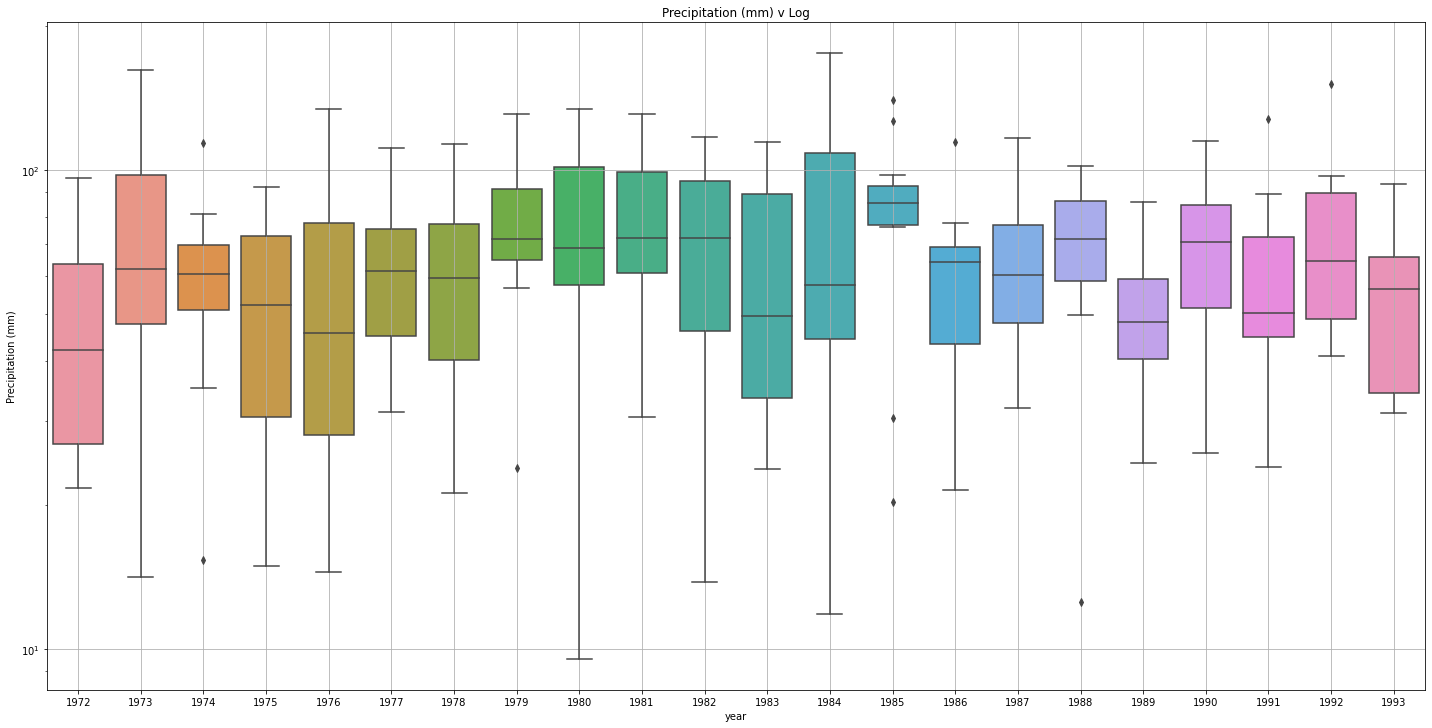

In [70]:
# Precip. boxplot
plt.subplots(figsize=(20,10))
ax  = sns.boxplot(x='year', y='prcp', data=wickairport_df)
plt.tight_layout()
plt.grid()  


ax.set_ylabel('Precipitation (mm)');
ax.set_title('Precipitation (mm) v Log')
ax.set_yscale('log')

For the rainfall

- The year 1984 and 1973 had the highest rainfall and the lowest was in 1980.
- Both the lower and upper quartiles of the 1984 and 1973 results are better than the rest.
- Since the interquartile range is smaller than the rest, the results from 1980 are more reliable.

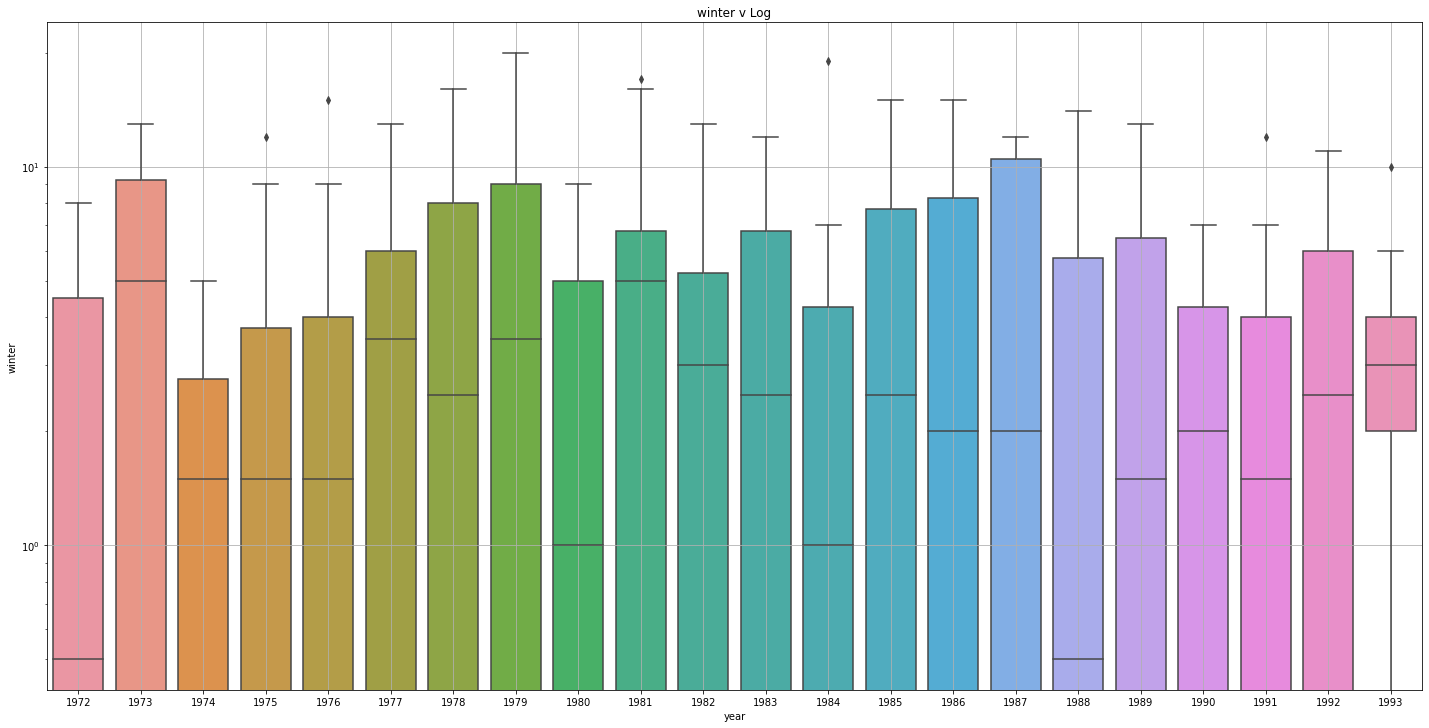

In [71]:

# winter. boxplot
plt.subplots(figsize=(20,10))
ax  = sns.boxplot(x='year', y='af days', data=wickairport_df,)
plt.tight_layout()
plt.grid()  


ax.set_ylabel('winter');
ax.set_title('winter v Log')
ax.set_yscale('log')

For the Snowfall

- The year 1979 had the highest snowfall and the lowest was in 1972.
- Both the lower and upper quartiles of the 1979 results are better than the rest.
- Since the interquartile range is smaller than the rest, the results from 1972 and 1988 are more reliable.

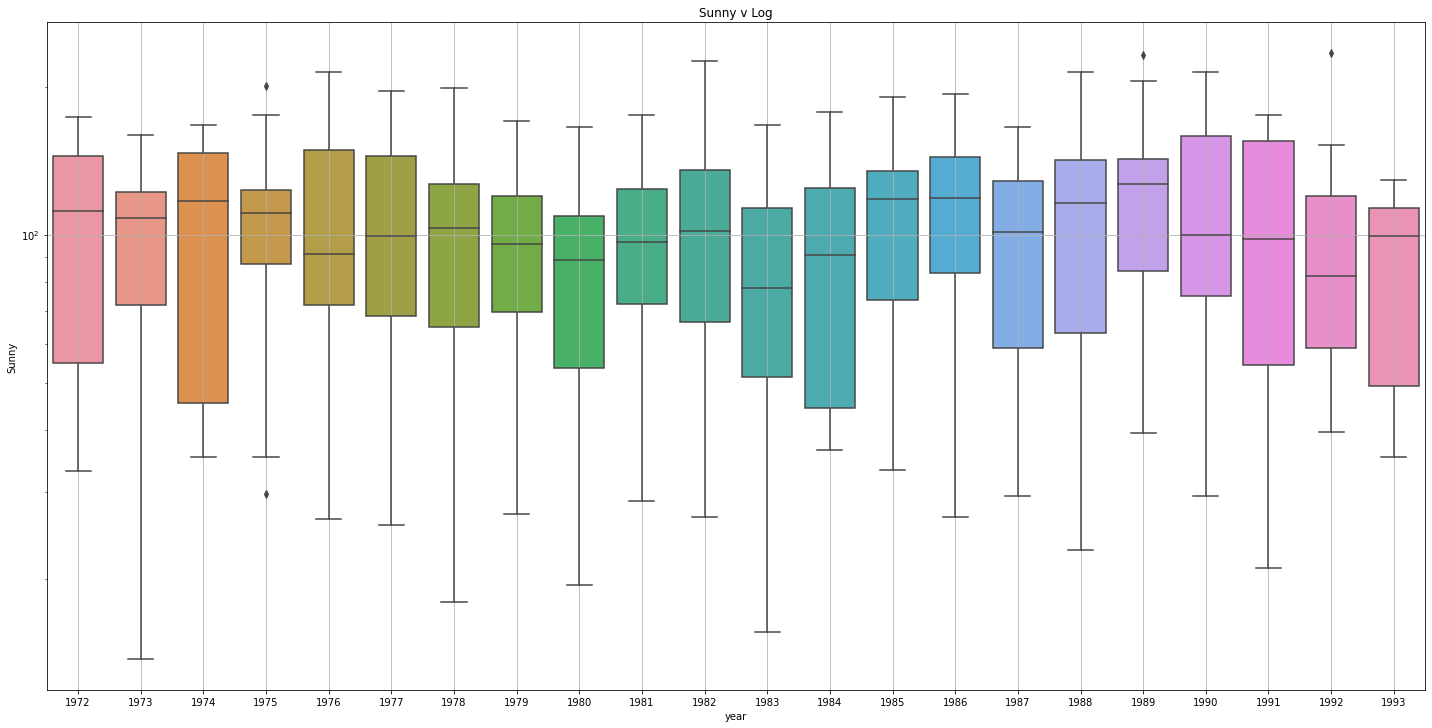

In [72]:

# sunny. boxplot
plt.subplots(figsize=(20,10))
ax  = sns.boxplot(x='year', y='sun hours', data=wickairport_df)
plt.tight_layout()
plt.grid()  


ax.set_ylabel('Sunny');
ax.set_title('Sunny v Log')
ax.set_yscale('log')

For the Sunny hours

- The year 1982 had the highest sun hours and the lowest was in 1973 and 1983.
- Both the lower and upper quartiles of the 1982 results are better than the rest.
- Since the interquartile range is smaller than the rest, the results from 1983 are more reliable.

In [73]:
df.city.unique()

array(['Wickairport', 'Oxford', 'Aberporth', 'Armagh'], dtype=object)

### Oxford

 What are the indicators of climate change in key locations in the UK?

In [74]:
oxford_df= df.query('city=="Oxford"')
oxford_df.head(3)

,max,min,af days,prcp,sun hours,city,country,year,mo,da,temp
date,,,,,,,,,,,
1972-01-01,6.4,2.0,6.0,60.5,41.8,Oxford,England,1972,1,1,4.20
1972-02-01,7.0,2.5,1.0,50.8,27.3,Oxford,England,1972,2,1,4.75
1972-03-01,11.8,2.8,4.0,63.2,144.0,Oxford,England,1972,3,1,7.30


### Distributions

/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_2337/2480508102.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


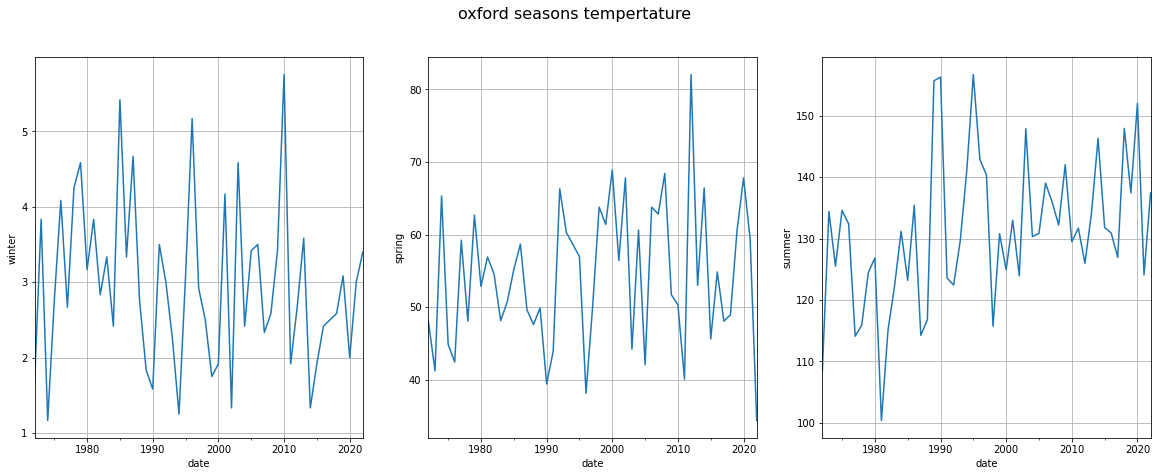

In [75]:
oxford_mean = oxford_df.resample('Y').mean()
fig, ax =plt.subplots(1,3, figsize=(20, 7))

fig.suptitle('oxford seasons tempertature', fontsize=16)

oxford_mean['af days'].plot(ax=ax[0], ylabel='winter',grid=True)

oxford_mean['prcp'].plot(ax=ax[1], ylabel='spring',grid=True)

oxford_mean['sun hours'].plot(ax=ax[2], ylabel='summer',grid=True)

# autumn_temps.plot(ax=ax[3], ylabel='autumn')


fig.show();

For this distribution the time range from 1972 to 2020.

- For winter season, can see a high peak around 2010 and a low peak in 1972.
- For Spring season, can see a high peak around 2010 and a low peak in 2020.
- For summer, can see a high peak in 1990 and 1995 and a low peak in 1982.

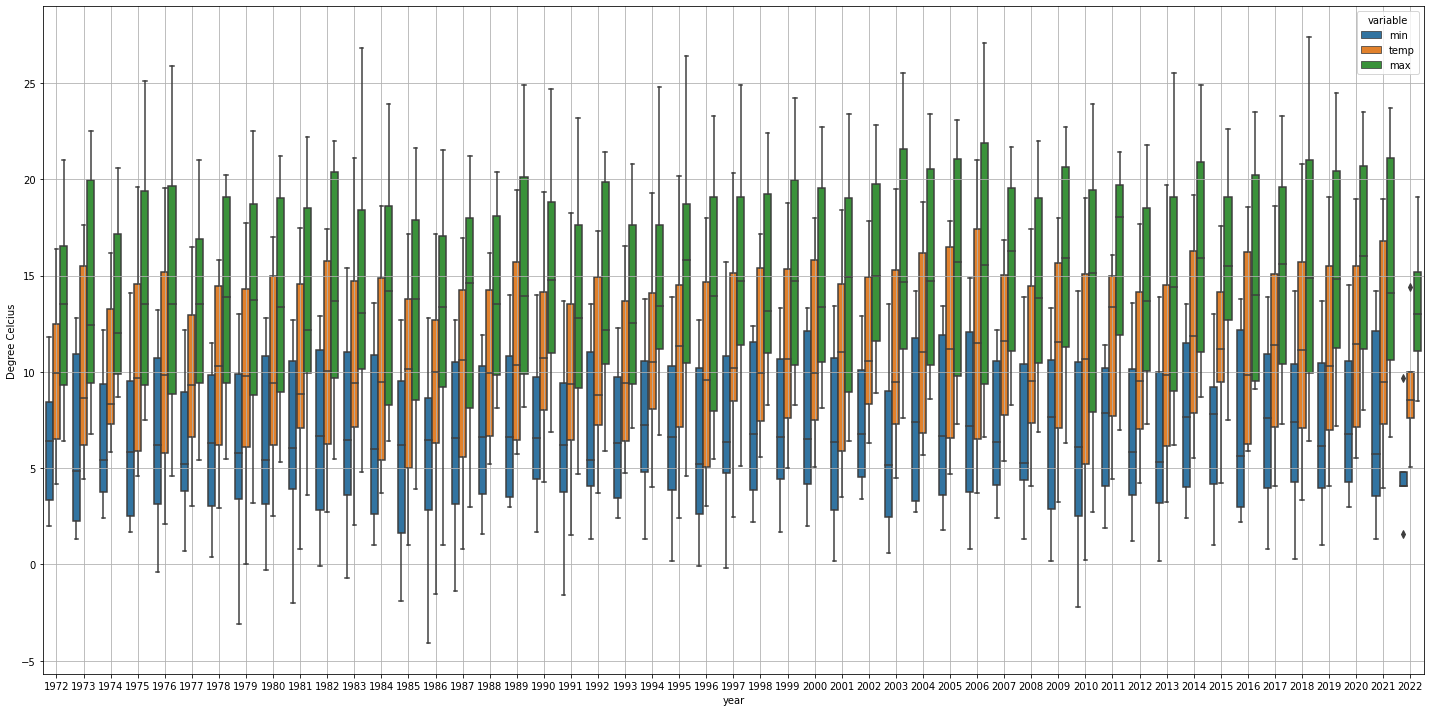

In [76]:
# melt to display
data = pd.melt(oxford_df, 'year', ['temp','min','max'], 
               var_name='variable', value_name='degree')

plt.subplots(figsize=(20,10))

# Avg, Min, Max temp. boxplot
ax = sns.boxplot(x='year',y='degree',hue='variable', hue_order=['min','temp','max'],
           data=data)
ax.set_ylabel('Degree Celcius')

plt.tight_layout()
plt.grid()  
plt.show()


**Highest**
- For the first 3 years with the highest temperature, 2018, 2006, and 1983 had the highest temperature in that order. 

- For our analysis, we will use the highest maximums, which for 2018 and 2006 were above 25 degrees celsius. In contrast to the other years, which had a median temperature above 10 degrees celsius each, 2018 and 2006 had minimum temperatures that were below 5.


**Lowest**

- Using the years with the lowest temperature below 0 degree celsius, the year 1986, 1979 and 2010 had the lowest temperature in that order. 

- With a median temperature of 10 degrees Celsius, the year 1986 had temperatures with a maximum above 15 and a minimum below -3. The average temperature in 1979 was below 10 degrees Celsius, with a maximum temperature of over 2- and a minimum temperature of under -2.

### What are the indicators of climate change in key locations in the UK?

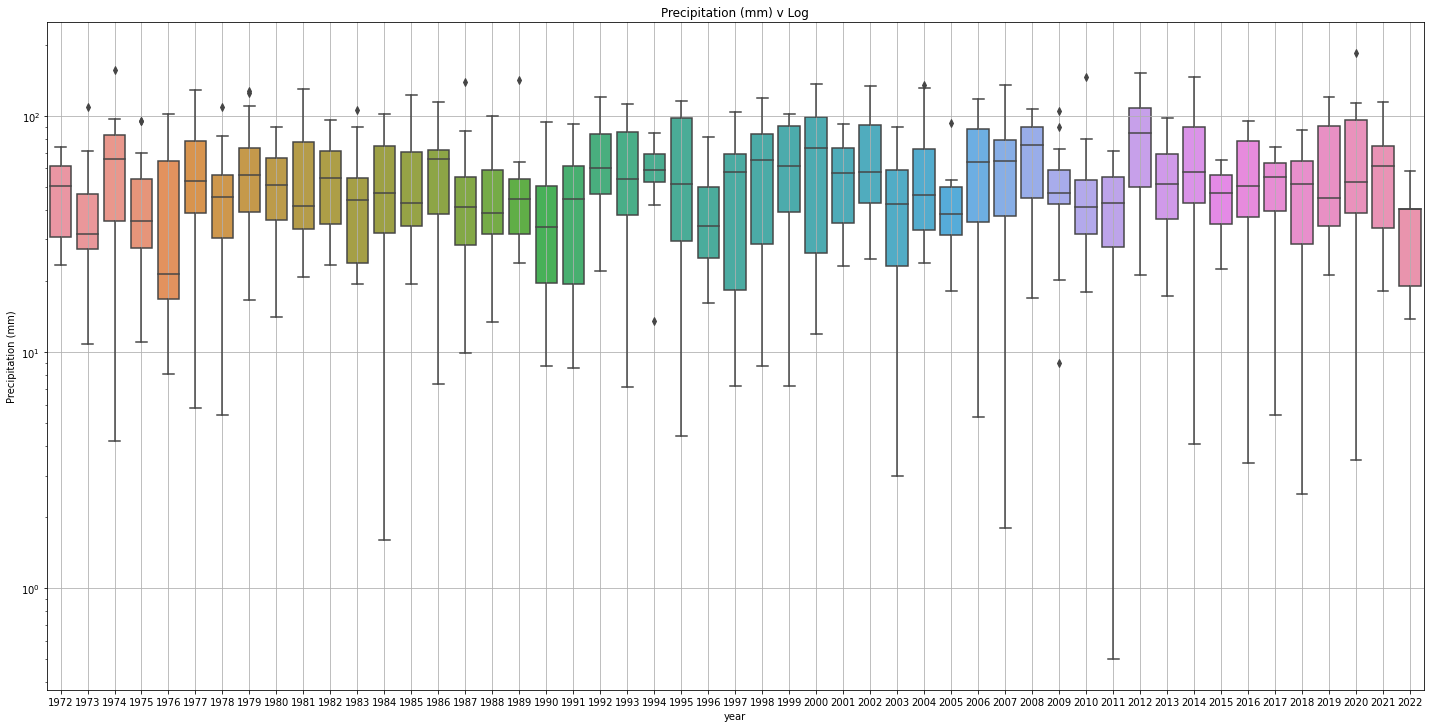

In [77]:
# Precip. boxplot
plt.subplots(figsize=(20,10))
ax  = sns.boxplot(x='year', y='prcp', data=oxford_df)
plt.tight_layout()
plt.grid()  


ax.set_ylabel('Precipitation (mm)');
ax.set_title('Precipitation (mm) v Log')
ax.set_yscale('log')

For the rainfall

- The year 2012 had the highest rainfall and the lowest was in 2011.
- Both the lower and upper quartiles of the 2012 results are better than the rest.
- Since the interquartile range is smaller than the rest, the results from 2011 are more reliable.

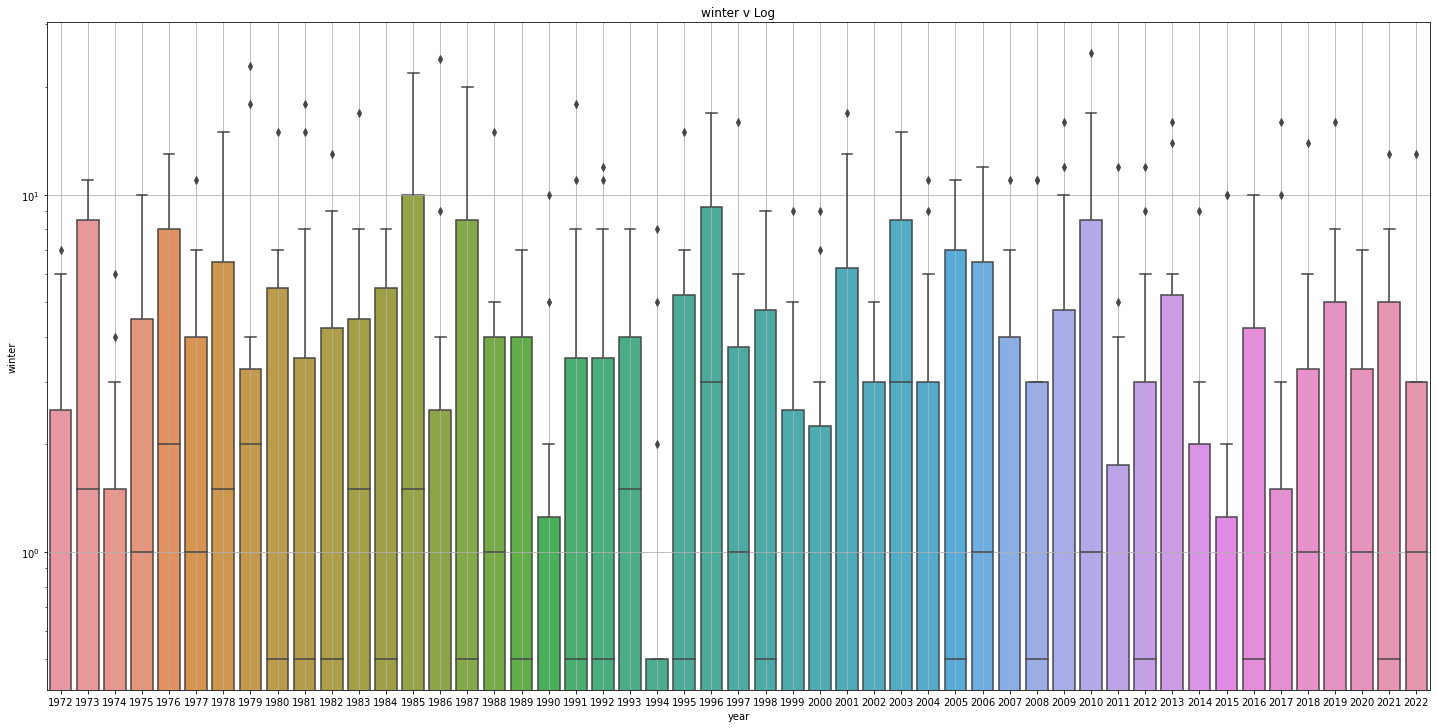

In [78]:

# winter. boxplot
plt.subplots(figsize=(20,10))
ax  = sns.boxplot(x='year', y='af days', data=oxford_df,)
plt.tight_layout()
plt.grid()  


ax.set_ylabel('winter');
ax.set_title('winter v Log')
ax.set_yscale('log')

For the Snowfall

- The year 1985 had the highest snowfall and the lowest was in 1994.
- Both the lower and upper quartiles of the 1985 results are better than the rest.
- Since the interquartile range is smaller than the rest, the results from 1994 are more reliable.

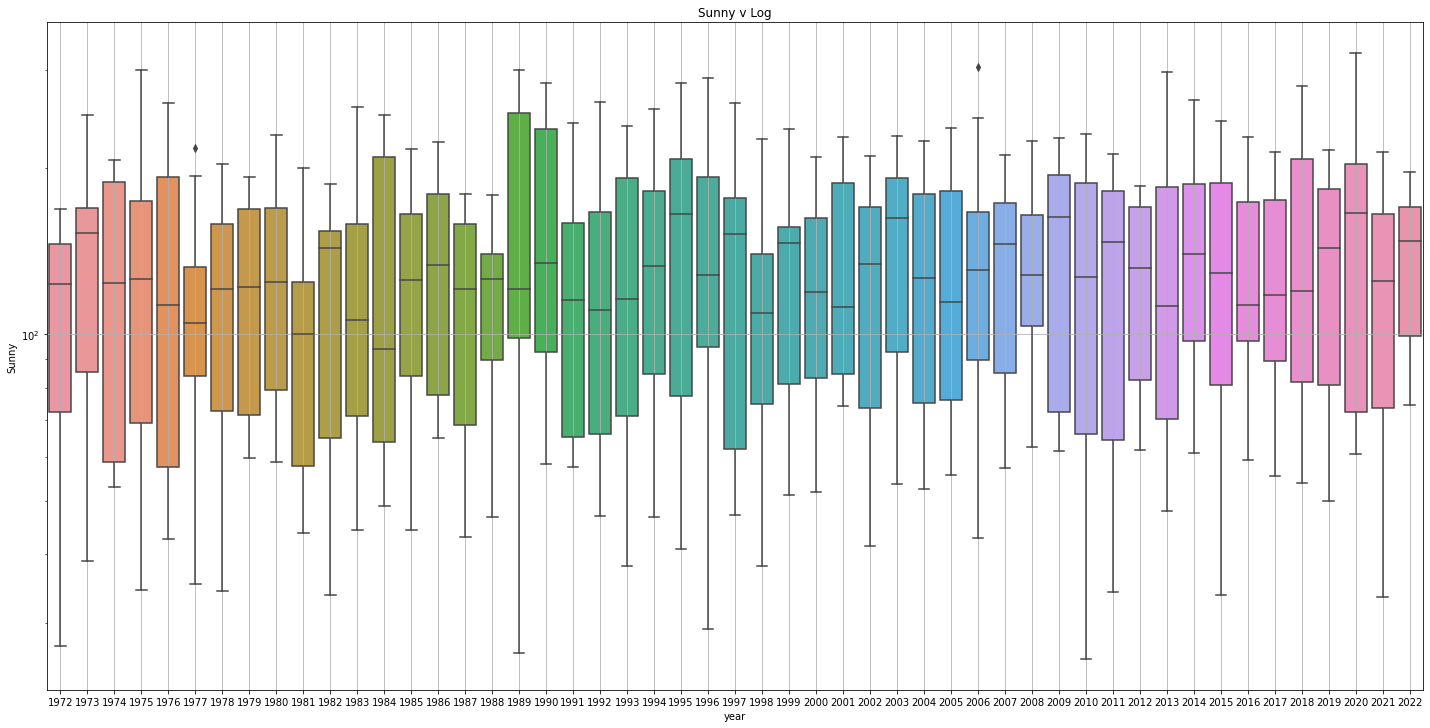

In [79]:

# sunny. boxplot
plt.subplots(figsize=(20,10))
ax  = sns.boxplot(x='year', y='sun hours', data=oxford_df)
plt.tight_layout()
plt.grid()  


ax.set_ylabel('Sunny');
ax.set_title('Sunny v Log')
ax.set_yscale('log')

For the Sunny hours

- The year 2020 had the highest sun hours and the lowest was in 1989.
- Both the lower and upper quartiles of the 2020 results are better than the rest.
- Since the interquartile range is smaller than the rest, the results from 1989 are more reliable.

In [80]:
df.city.unique()

array(['Wickairport', 'Oxford', 'Aberporth', 'Armagh'], dtype=object)

### Aberporth

 What are the indicators of climate change in key locations in the UK?

In [81]:
aberporth_df= df.query('city=="Aberporth"')
aberporth_df.head(3)

,max,min,af days,prcp,sun hours,city,country,year,mo,da,temp
date,,,,,,,,,,,
1972-01-01,6.8,2.8,3.0,102.0,48.1,Aberporth,Wales,1972,1,1,4.80
1972-02-01,7.0,2.7,1.0,88.4,54.9,Aberporth,Wales,1972,2,1,4.85
1972-03-01,9.1,3.8,2.0,61.1,127.9,Aberporth,Wales,1972,3,1,6.45


### Distributions

/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_2337/2327285652.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


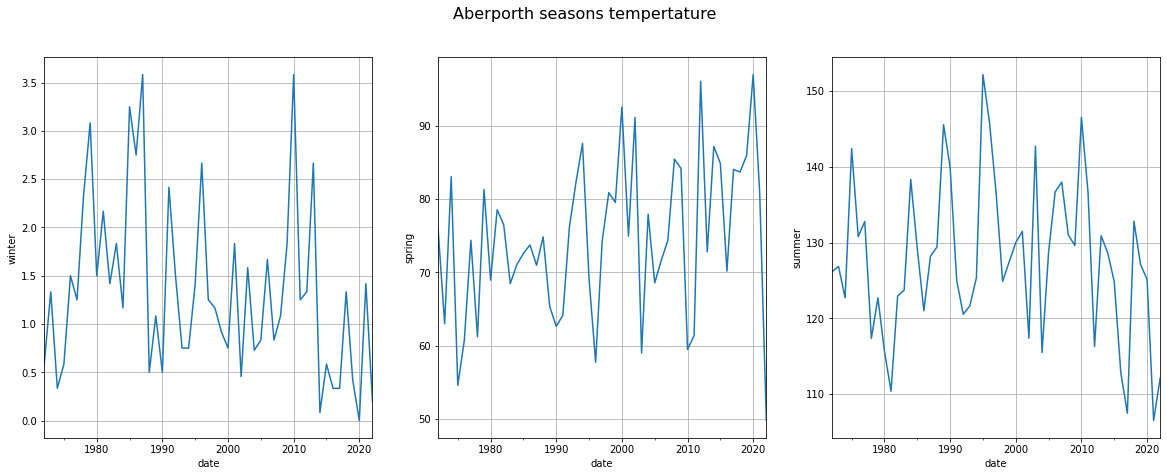

In [82]:
aberporth_mean = aberporth_df.resample('Y').mean()
fig, ax =plt.subplots(1,3, figsize=(20, 7))

fig.suptitle('Aberporth seasons tempertature', fontsize=16)

aberporth_mean['af days'].plot(ax=ax[0], ylabel='winter',grid=True)

aberporth_mean['prcp'].plot(ax=ax[1], ylabel='spring',grid=True)

aberporth_mean['sun hours'].plot(ax=ax[2], ylabel='summer',grid=True)

# autumn_temps.plot(ax=ax[3], ylabel='autumn')


fig.show();

For this distribution the time range from 1972 to 2020.

- For winter season, can see a high peak around 2010 and a low peak in 2020.
- For Spring season, can see a high peak around 2020 and a low peak in 2021.
- For summer, can see a high peak in 1995 and a low peak in 2021.

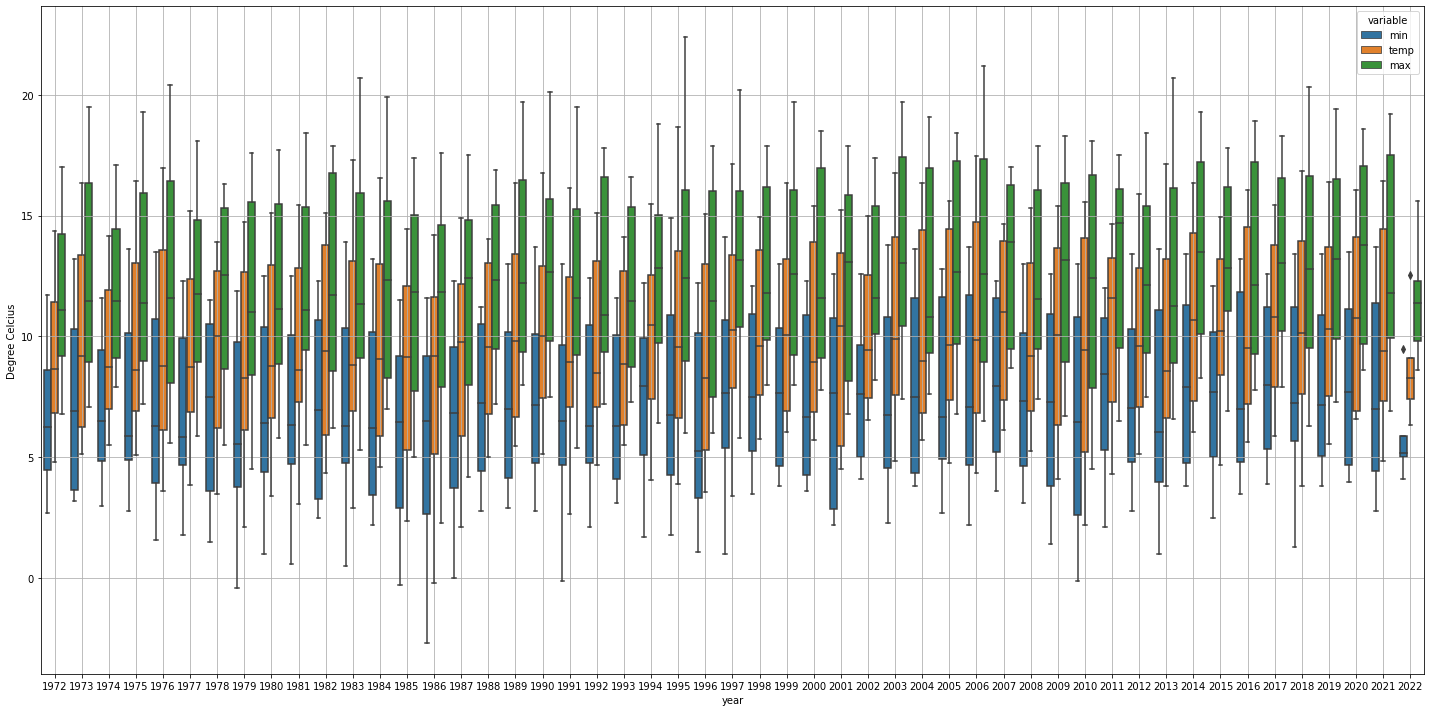

In [83]:
# melt to display
data = pd.melt(aberporth_df, 'year', ['temp','min','max'], 
               var_name='variable', value_name='degree')

plt.subplots(figsize=(20,10))

# Avg, Min, Max temp. boxplot
ax = sns.boxplot(x='year',y='degree',hue='variable', hue_order=['min','temp','max'],
           data=data)
ax.set_ylabel('Degree Celcius')

plt.tight_layout()
plt.grid()  
plt.show()


**Highest**
- For the first 3 years with the highest temperature, 1995, 2006, and 2013 had the highest temperature in that order. 

- For our analysis, we will use the highest maximums, which for 1995 and 2006 were above 20 degrees celsius. In contrast to the other years, which had a median temperature above 8 degrees celsius and for 2006 was above 8, 1995 and 2006 had minimum temperatures that were below 5.


**Lowest**

- Using the years with the lowest temperature below 0 degree celsius, the year 1986, 1979 and 1985 had the lowest temperature in that order. 

- With a median temperature of 10 degrees Celsius, the year 1986 had temperatures with a maximum above 15 and a minimum below -3. The average temperature in 1979 was below 10 degrees Celsius, with a maximum temperature of over 15 and a minimum temperature of under -2.

### What are the indicators of climate change in key locations in the UK?

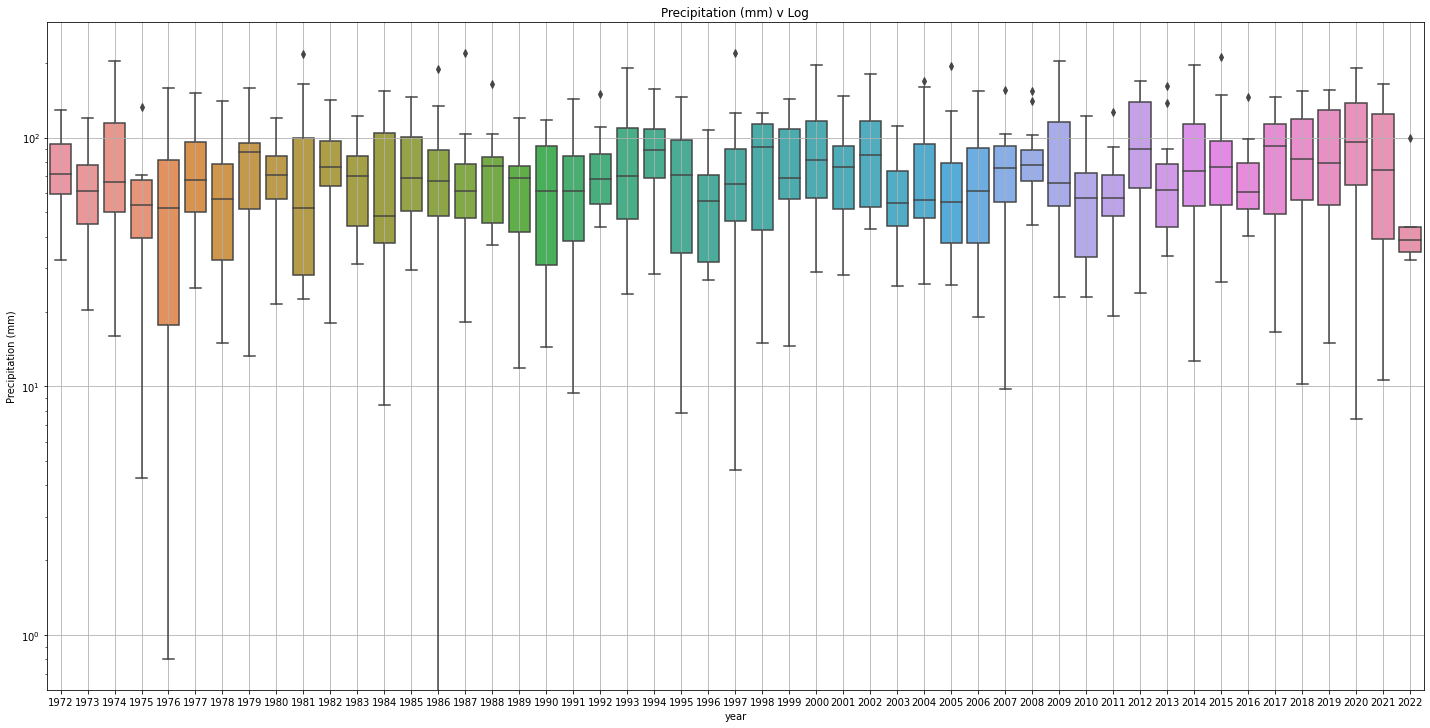

In [84]:
# Precip. boxplot
plt.subplots(figsize=(20,10))
ax  = sns.boxplot(x='year', y='prcp', data=aberporth_df)
plt.tight_layout()
plt.grid()  


ax.set_ylabel('Precipitation (mm)');
ax.set_title('Precipitation (mm) v Log')
ax.set_yscale('log')

For the rainfall

- The year 1974 had the highest rainfall and the lowest was in 1986.
- Both the lower and upper quartiles of the 1974 results are better than the rest.
- Since the interquartile range is smaller than the rest, the results from 1986 are more reliable.

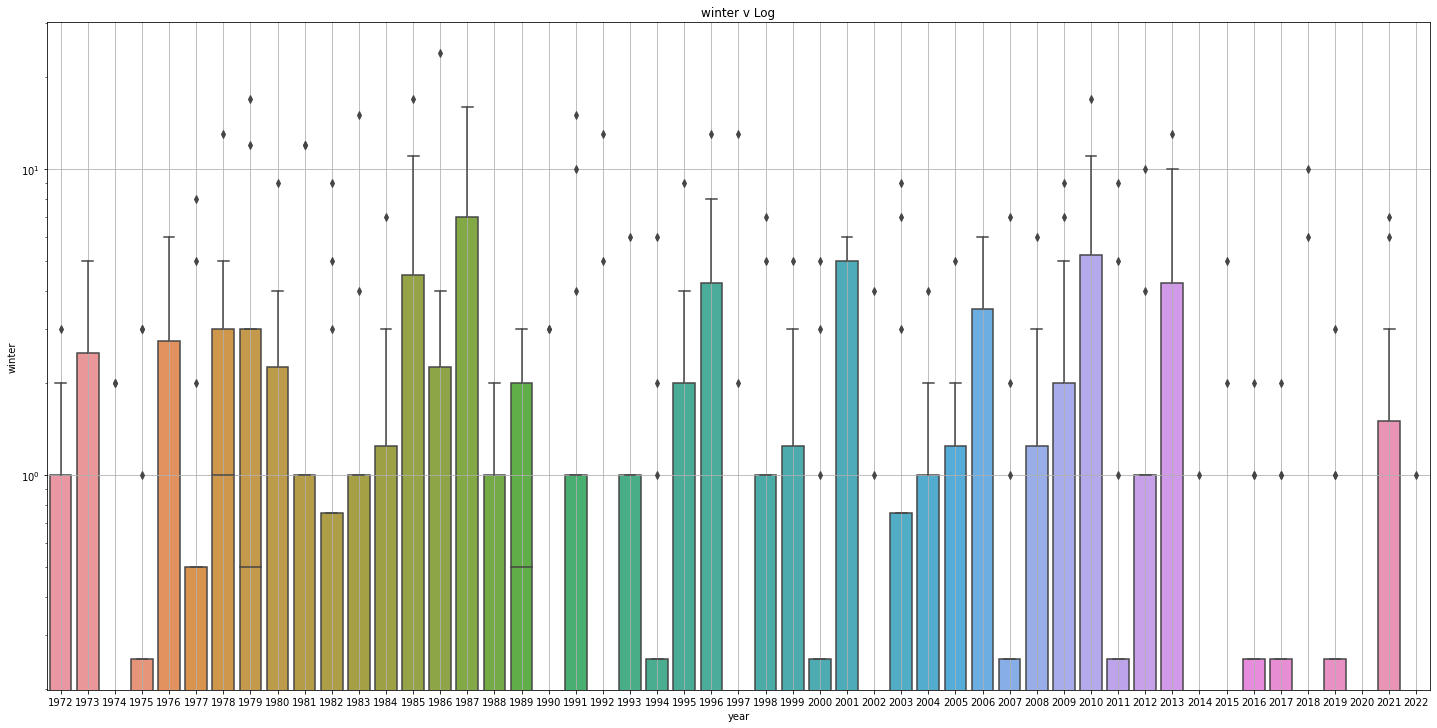

In [85]:

# winter. boxplot
plt.subplots(figsize=(20,10))
ax  = sns.boxplot(x='year', y='af days', data=aberporth_df,)
plt.tight_layout()
plt.grid()  


ax.set_ylabel('winter');
ax.set_title('winter v Log')
ax.set_yscale('log')

For the Snowfall

- The year 1987 had the highest snowfall and the lowest was in 1979.
- Both the lower and upper quartiles of the 1987 results are better than the rest.
- Since the interquartile range is smaller than the rest, the results from 1979 are more reliable.

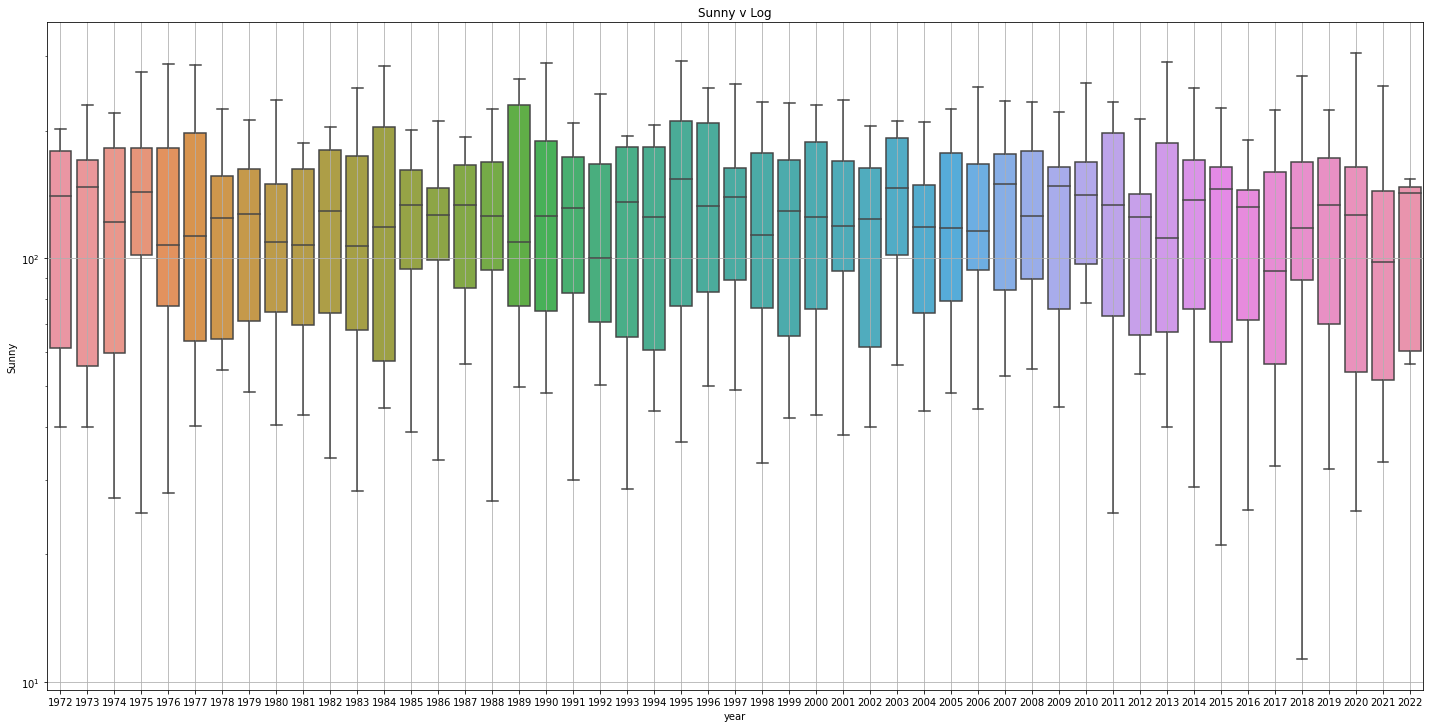

In [86]:

# sunny. boxplot
plt.subplots(figsize=(20,10))
ax  = sns.boxplot(x='year', y='sun hours', data=aberporth_df)
plt.tight_layout()
plt.grid()  


ax.set_ylabel('Sunny');
ax.set_title('Sunny v Log')
ax.set_yscale('log')

For the Sunny hours

- The year 2020 had the highest sun hours and the lowest was in 2018.
- Both the lower and upper quartiles of the 2020 results are better than the rest.
- Since the interquartile range is smaller than the rest, the results from 2018 are more reliable.

In [87]:
df.city.unique()

array(['Wickairport', 'Oxford', 'Aberporth', 'Armagh'], dtype=object)

### Aberporth

 What are the indicators of climate change in key locations in the UK?

In [88]:
armagh_df= df.query('city=="Armagh"')
armagh_df.head(3)

,max,min,af days,prcp,sun hours,city,country,year,mo,da,temp
date,,,,,,,,,,,
1972-01-01,6.4,0.6,10.0,109.6,38.2,Armagh,Northern Ireland,1972,1,1,3.5
1972-02-01,7.5,1.1,7.0,54.6,69.8,Armagh,Northern Ireland,1972,2,1,4.3
1972-03-01,10.0,1.6,9.0,82.4,110.3,Armagh,Northern Ireland,1972,3,1,5.8


### Distributions

/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_2337/1814306952.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


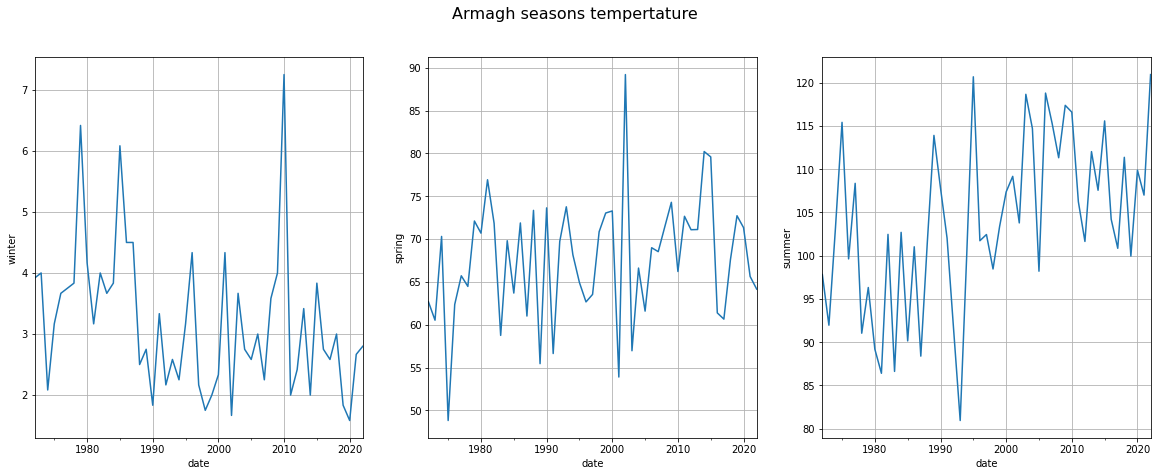

In [89]:
armagh_mean = armagh_df.resample('Y').mean()
fig, ax =plt.subplots(1,3, figsize=(20, 7))

fig.suptitle('Armagh seasons tempertature', fontsize=16)

armagh_mean['af days'].plot(ax=ax[0], ylabel='winter',grid=True)

armagh_mean['prcp'].plot(ax=ax[1], ylabel='spring',grid=True)

armagh_mean['sun hours'].plot(ax=ax[2], ylabel='summer',grid=True)

# autumn_temps.plot(ax=ax[3], ylabel='autumn')


fig.show();

For this distribution the time range from 1972 to 2020.

- For winter season, can see a high peak around 2010 and a low peak in 2020.
- For Spring season, can see a high peak around 2004 and a low peak in 1975.
- For summer, can see a high peak in 1995 and a low peak in 1994.

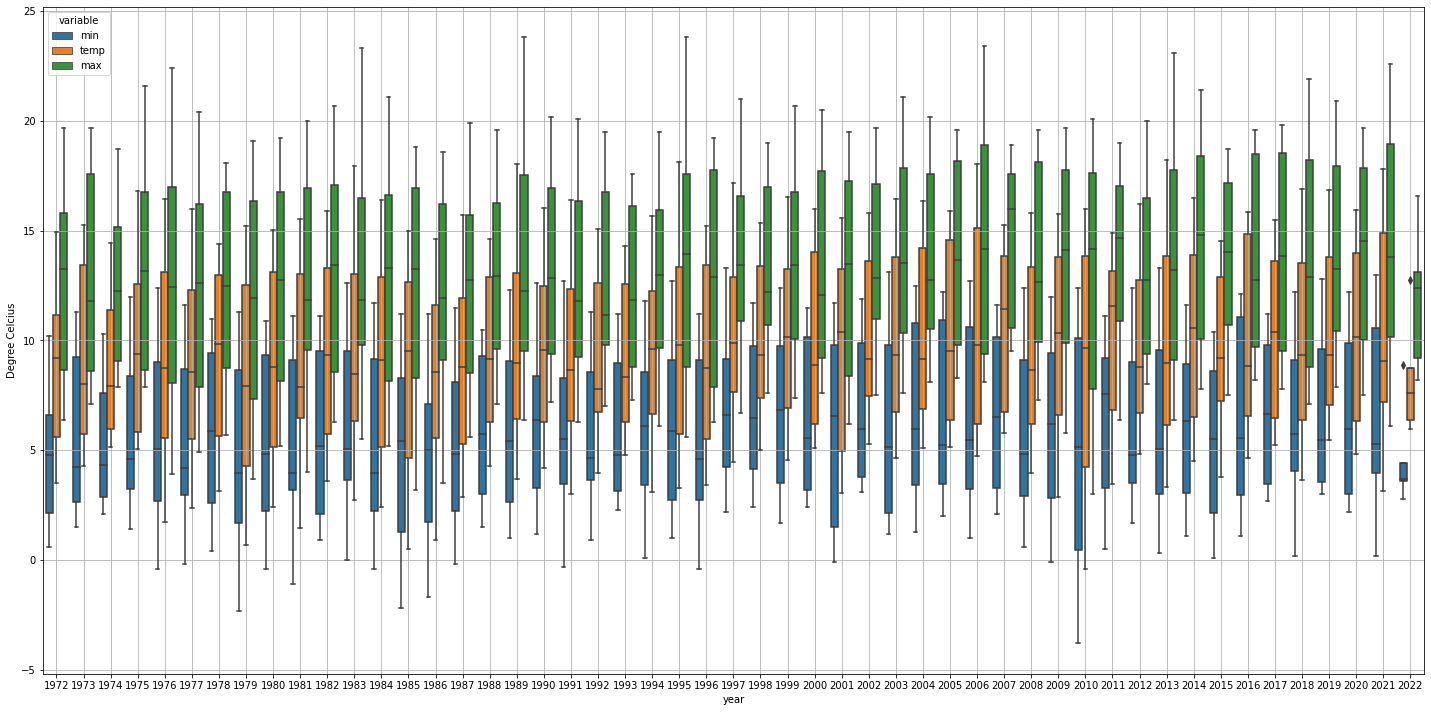

In [90]:
# melt to display
data = pd.melt(armagh_df, 'year', ['temp','min','max'], 
               var_name='variable', value_name='degree')

plt.subplots(figsize=(20,10))

# Avg, Min, Max temp. boxplot
ax = sns.boxplot(x='year',y='degree',hue='variable', hue_order=['min','temp','max'],
           data=data)
ax.set_ylabel('Degree Celcius')

plt.tight_layout()
plt.grid()  
plt.show()


**Highest**
- For the first 3 years with the highest temperature, 1995, 1989, and 2006 had the highest temperature in that order. 

- For our analysis, we will use the highest maximums, which for 1995, 1989 were above 20 degrees celsius. In contrast to the other years, which had a median temperature above 9 degrees celsius and for 1995 was above 8, 1995 and 1989 had minimum temperatures that were below 2 degree celsius.


**Lowest**

- Using the years with the lowest temperature below 0 degree celsius, the year 2010, 1979 and 1985 had the lowest temperature in that order. 

- With a median temperature below 10 degrees Celsius, the year 2010 had temperatures with a maximum above 15 and a minimum below -4. The average temperature in 1979 was below 10 degrees Celsius, with a maximum temperature of over 15 and a minimum temperature of under -2.

### What are the indicators of climate change in key locations in the UK?

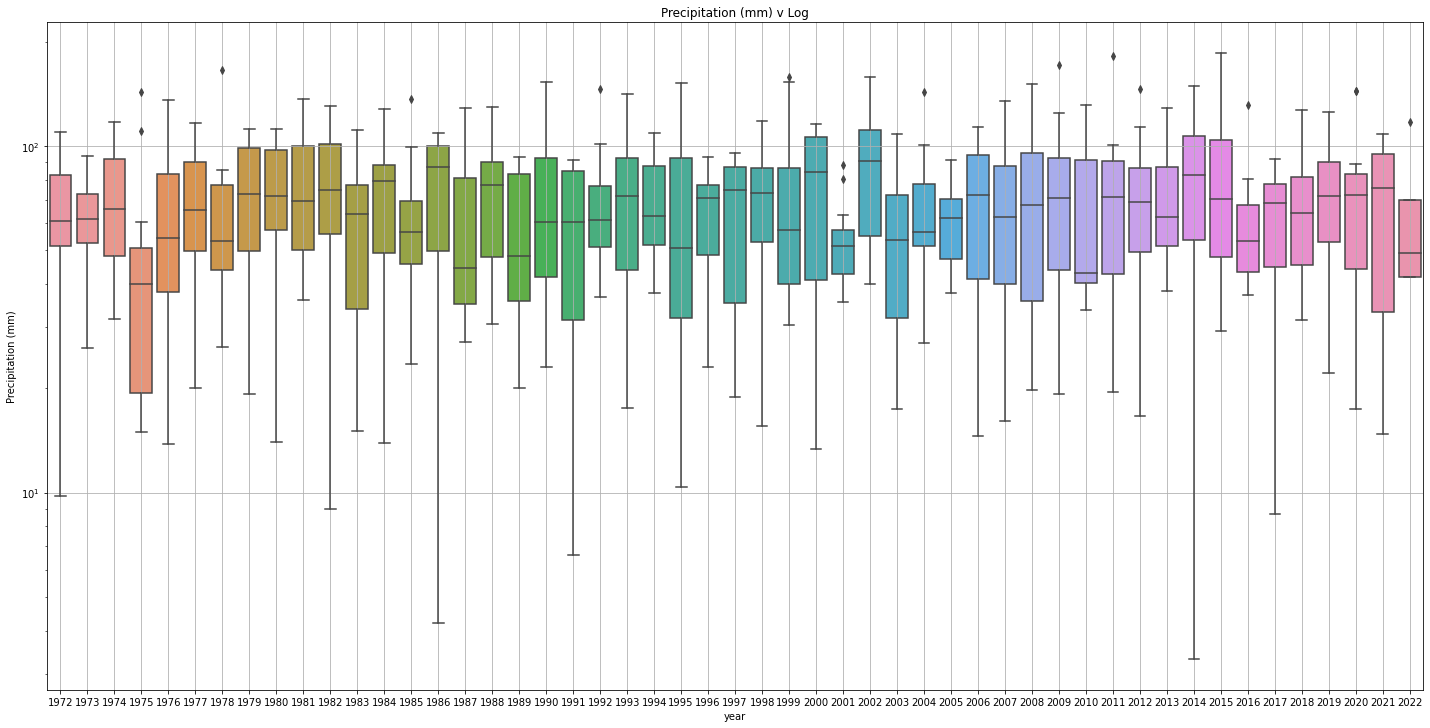

In [91]:
# Precip. boxplot
plt.subplots(figsize=(20,10))
ax  = sns.boxplot(x='year', y='prcp', data=armagh_df)
plt.tight_layout()
plt.grid()  


ax.set_ylabel('Precipitation (mm)');
ax.set_title('Precipitation (mm) v Log')
ax.set_yscale('log')

For the rainfall

- The year 2016 had the highest rainfall and the lowest was in 2014.
- Both the lower and upper quartiles of the 2016 results are better than the rest.
- Since the interquartile range is smaller than the rest, the results from 2014 are more reliable.

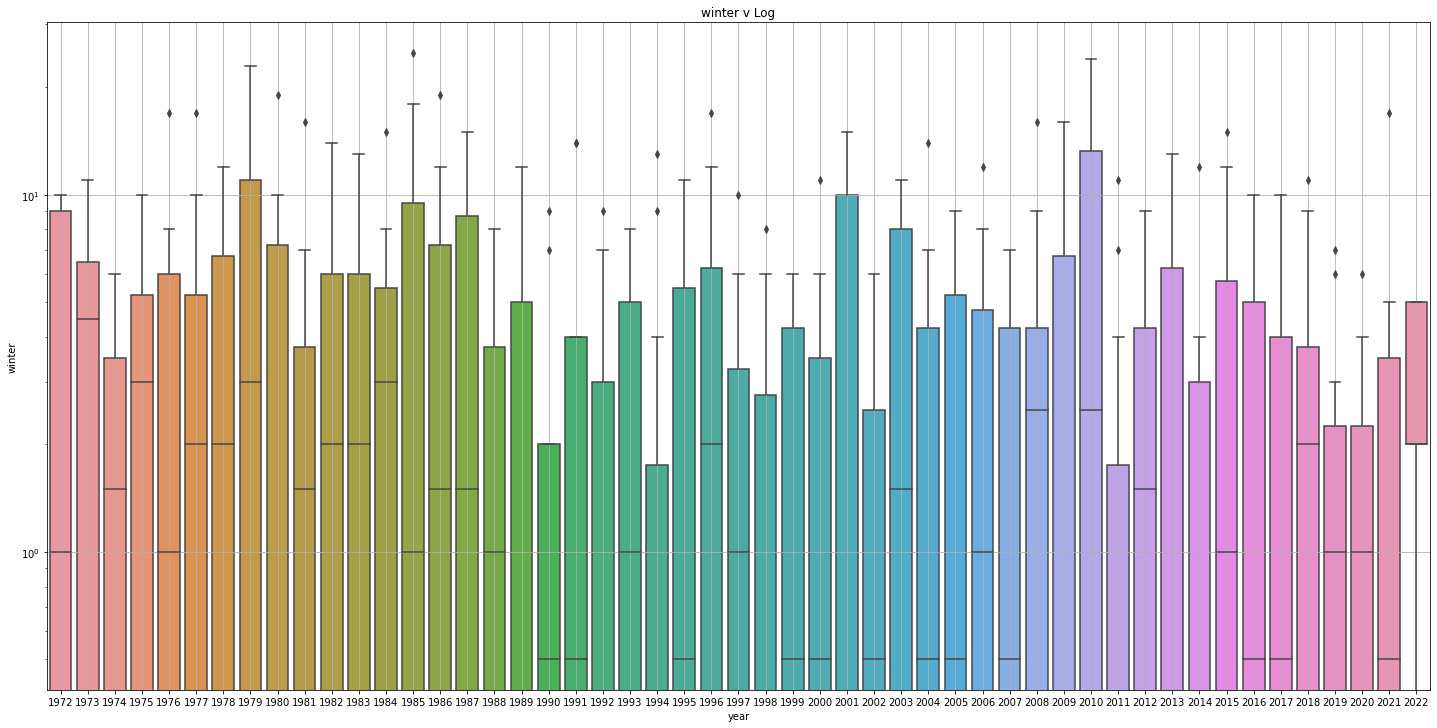

In [92]:

# winter. boxplot
plt.subplots(figsize=(20,10))
ax  = sns.boxplot(x='year', y='af days', data=armagh_df,)
plt.tight_layout()
plt.grid()  


ax.set_ylabel('winter');
ax.set_title('winter v Log')
ax.set_yscale('log')

For the Snowfall

- The year 2010 had the highest snowfall and the lowest was in 2022.
- Both the lower and upper quartiles of the 2020 results are better than the rest.
- Since the interquartile range is smaller than the rest, the results from 2022 are more reliable.

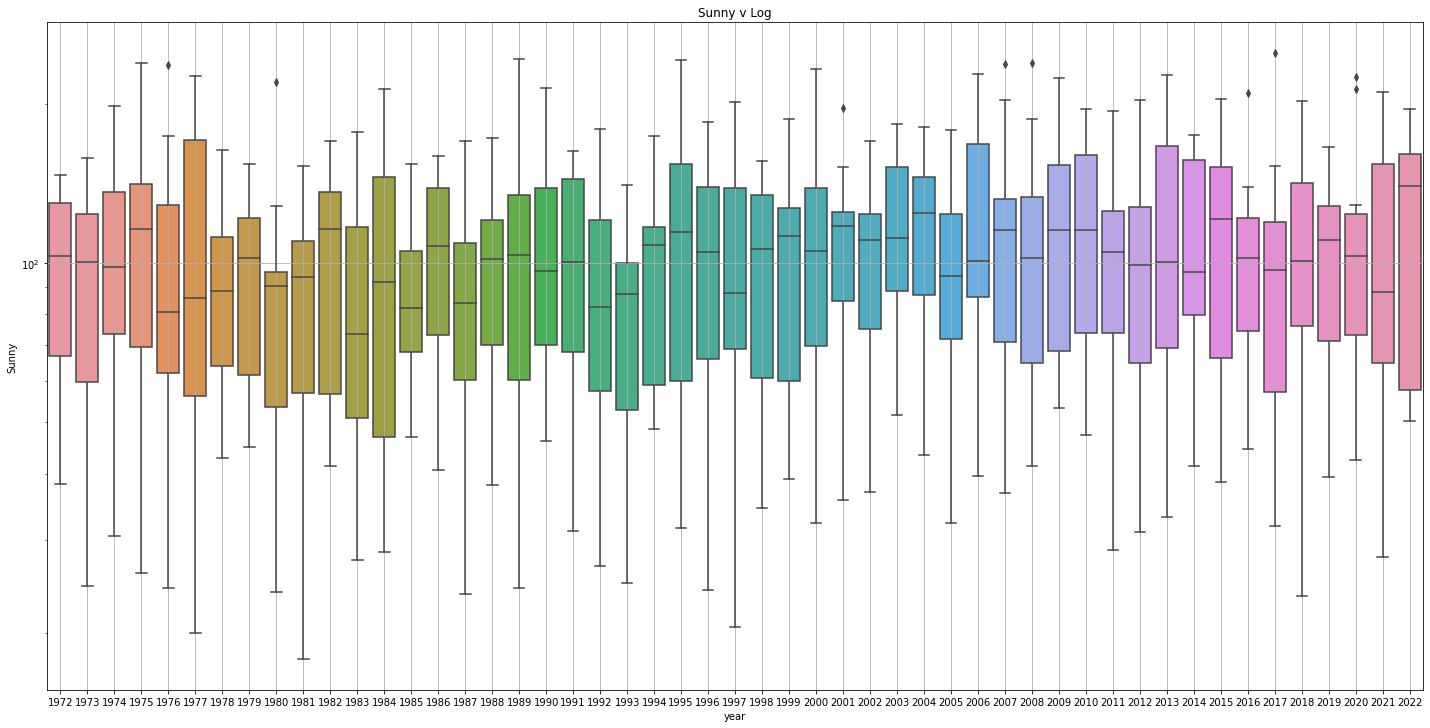

In [93]:

# sunny. boxplot
plt.subplots(figsize=(20,10))
ax  = sns.boxplot(x='year', y='sun hours', data=armagh_df)
plt.tight_layout()
plt.grid()  


ax.set_ylabel('Sunny');
ax.set_title('Sunny v Log')
ax.set_yscale('log')

For the Sunny hours

- The year 1995 had the highest sun hours and the lowest was in 1981.
- Both the lower and upper quartiles of the 1995 results are better than the rest.
- Since the interquartile range is smaller than the rest, the results from 1981 are more reliable.

## Forecast

Time series data can be phrased as supervised learning. 

Since we are going to forecast the temperature, our problem is a Univariate Time Series. Where only a temperature is observed at each time quartely. 

In [94]:
# Create a supervised learning dataset from a time series dataset.
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [95]:
quartely_df = df.resample('Q').mean()
yearly_df = df.resample('Y').mean()

In [96]:
# series = quartely_df['temp']#.values
series = yearly_df['temp']#.values

In [97]:
series

date
1972-12-31     8.872917
1973-12-31     9.179167
1974-12-31     9.080208
1975-12-31     9.519792
1976-12-31     9.459375
1977-12-31     8.952083
1978-12-31     8.943750
1979-12-31     8.364583
1980-12-31     9.018750
1981-12-31     8.854167
1982-12-31     9.375000
1983-12-31     9.507292
1984-12-31     9.266667
1985-12-31     8.510417
1986-12-31     8.371875
1987-12-31     8.751042
1988-12-31     9.373958
1989-12-31     9.886458
1990-12-31    10.003125
1991-12-31     9.200000
1992-12-31     9.356250
1993-12-31     9.090000
1994-12-31    10.122222
1995-12-31    10.623611
1996-12-31     9.429167
1997-12-31    10.688889
1998-12-31    10.487500
1999-12-31    10.651389
2000-12-31    10.331944
2001-12-31    10.068056
2002-12-31    10.587143
2003-12-31    10.505556
2004-12-31    10.648571
2005-12-31    10.651389
2006-12-31    10.850000
2007-12-31    10.784722
2008-12-31    10.219444
2009-12-31    10.312500
2010-12-31     9.272222
2011-12-31    10.820833
2012-12-31    10.091667
2013-12-31 

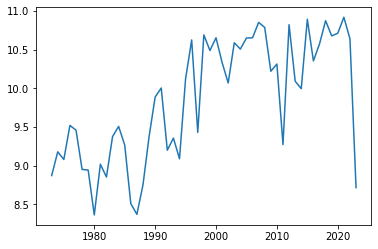

In [98]:
# plot dataset
plt.plot(series)
plt.show()

## Checks for Stationarity

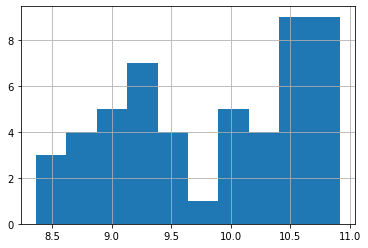

In [99]:
series.hist()
plt.show()

In [100]:
# split the time series into two contiguous sequences. 
# We can then calculate the mean and variance of each group of numbers and compare the values.

X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('\nvariance1=%f, variance2=%f' % (var1, var2))

mean1=9.300029, mean2=10.424929

variance1=0.339635, variance2=0.250631


We can see that although the mean and variance values differ, they are roughly in the same range.

By plotting the values of the time series as a histogram, let's take a step back and see if assuming a Gaussian distribution makes sense in this situation.

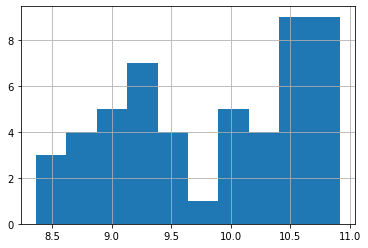

In [101]:
series.hist()
plt.show()

we can see the more familiar Gaussian-like or Uniform-like distribution of values.

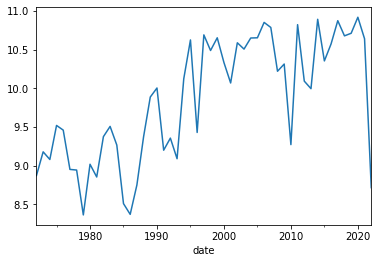

In [102]:
series.plot()
plt.show()

Lets make a statiscal test.

Augmented Dickey-Fuller test.

Statistical tests make strong assumptions about the data.

In [103]:
from statsmodels.tsa.stattools import adfuller
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print()

print('p-value: %f' % result[1])
if result[1] > 0.05:
    print('Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.')
elif result[1] <= 0.05:
    print('Reject the null hypothesis (H0), the data does not have a unit root and is stationary.')

    
print('\nCritical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.868702

p-value: 0.049110
Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Critical Values:
	1%: -3.568
	5%: -2.921
	10%: -2.599


/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Lambda: 2.893948


/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


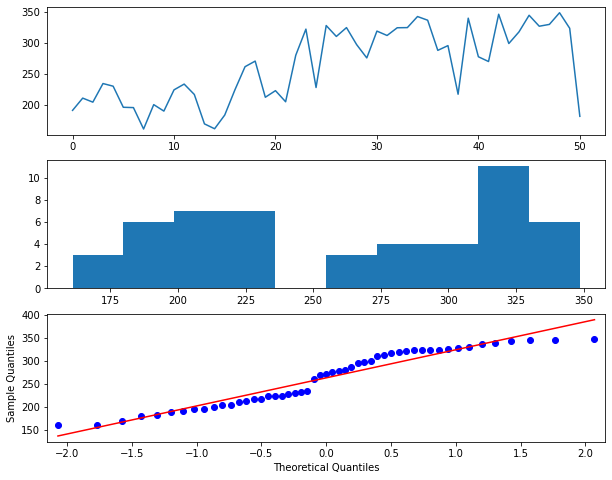

In [104]:
from scipy.stats import boxcox
from statsmodels.graphics.gofplots import qqplot

transformed, lam = boxcox(X)
print('Lambda: %f' % lam)
plt.figure(1, figsize=(10,8))
# line plot
plt.subplot(311)
plt.plot(transformed)
# histogram
plt.subplot(312)
plt.hist(transformed)
# q-q plot
plt.subplot(313)
qqplot(transformed, line='r', ax=plt.gca())
plt.show()

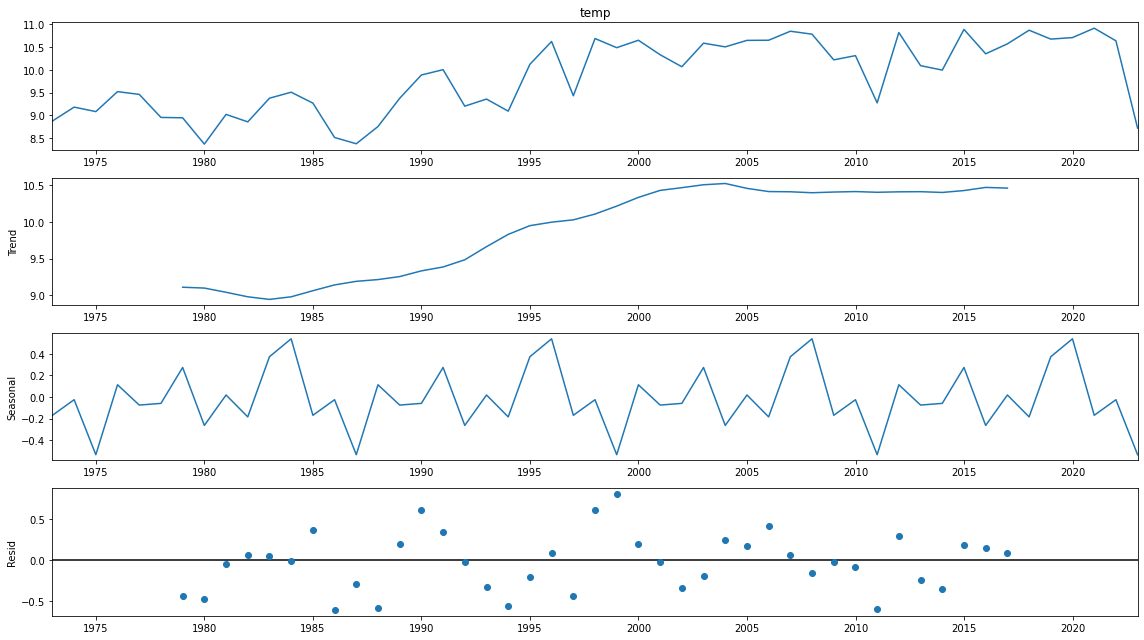

In [105]:
from statsmodels.tsa import seasonal

decomp = seasonal.seasonal_decompose(series, period=12)

fig = decomp.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
# plt.show()
# decomp.plot(figsize=(18,8));

It is easy to see how similar the pattern is for each year period. Such similarity suggests that your data have strong seasonality.

model our time series into 5 years

In [106]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression


In [107]:
series_data = series_to_supervised(pd.DataFrame(series), 3).values

In [108]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

implements this by building a model, making a one-step prediction, and using the test input row and training dataset as input.

In [109]:
def linear_regression_forecast(train, testX):
    train = np.asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]

    # fit model
    model = LinearRegression()
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]


By choosing a cut point, the dataset is first divided into train and test sets, with all data except for the most recent 12 months being used for training and the most recent 12 months being used for testing.

In [110]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = linear_regression_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions
 

the dataset's last 12 months' worth of predicted values and expected values.

>expected=10.8, predicted=9.5
>expected=10.1, predicted=10.2
>expected=10.0, predicted=10.3
>expected=10.9, predicted=10.0
>expected=10.4, predicted=10.4
>expected=10.6, predicted=10.4
>expected=10.9, predicted=10.4
>expected=10.7, predicted=10.6
>expected=10.7, predicted=10.6
>expected=10.9, predicted=10.6
>expected=10.6, predicted=10.7
>expected=8.7, predicted=10.7
MAE: 0.476


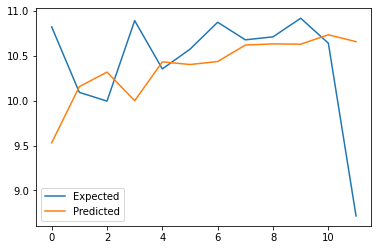

In [111]:
# evaluate
mae, y, yhat = walk_forward_validation(series_data, 12)

print('MAE: %.3f' % mae)
# plot expected vs predicted
# plt.figure(figsize=(10,8))
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

The forecast does have the characteristic of a persistence forecast. This does suggest that although this time series does have an obvious trend, it is still a reasonably difficult problem.

### Linear regression with Sktime

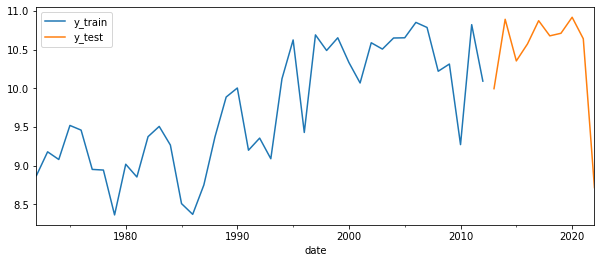

In [112]:
# get data split
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(series, test_size=10)

fig, ax = plt.subplots(1,1, figsize=(10, 4))
y_train.plot(ax=ax, label='y_train')
y_test.plot(ax=ax, label='y_test')
plt.legend()

In [119]:
from sktime.forecasting.compose import make_reduction
from sktime.utils.plotting import plot_series

regressor = LinearRegression()
forecaster = make_reduction(regressor, window_length=10, strategy="recursive")

In [122]:
# forecast how many years?
fh = np.arange(1, 11)

/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/sktime/utils/datetime.py:108: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if not hasattr(x, "freq") or x.freq is None:
/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/sktime/utils/datetime.py:110: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  by *= x.freq
/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:565: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  cutoff = _coerce_to_period(cutoff, freq=cutoff.freqstr)


mae: 0.07264614518987772


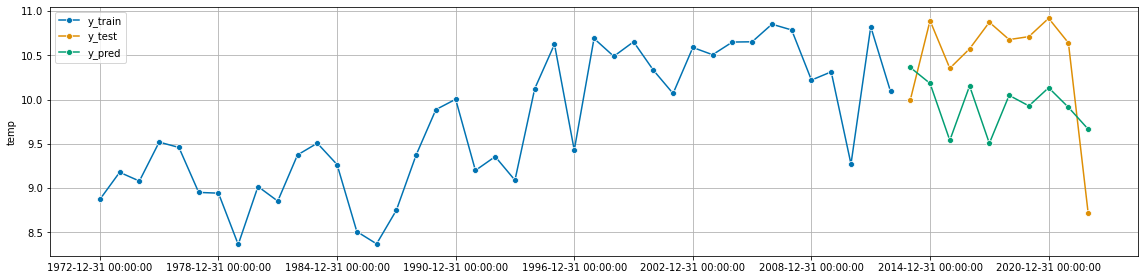

In [127]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.grid()
plt.tight_layout()

# mean_absolute_percentage_error(y_test, y_pred)
print(f'mae: {mean_absolute_percentage_error(y_test, y_pred, symmetric=False)}')

#### Limitation

The primary defense against using linear regression for time series data is that extrapolation, or making predictions outside the data's range, is typically what we're interested in doing. Linear regression extrapolation is rarely accurate. Many well-known time series models, though, also fail to extrapolate accurately.

#### Discussion
For time series, autocorrelation is nothing exceptional. A "residual versus fitted" chart is used in any linear regression to determine whether the residual exhibits any patterns in relation to the independent variable. If time is the independent variable, we have a special word for those patterns, but the problem applies to all types of data.